FAKULTAS PENDIDIKAN MATEMATIKA DAN ILMU PENGETAHUAN ALAM

Sumber Data:\
1. Biro Kepegawaian UPI (16 Agustus 2022)\
2. Website SINTA (23 Agustus 2022)

Versi Dokumen: 01/240922

Disiapkan oleh: pusdat@upi.edu

In [1]:
%matplotlib inline
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt     
import seaborn as sns
from matplotlib import rc
import matplotlib.colors as mcolors
from datetime import datetime, date
from IPython.core.display import HTML
import textwrap
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from IPython.display import Image
from IPython.display import display_markdown
from IPython.display import Markdown


sns.set_theme(style="whitegrid")

data = pd.read_csv("C:\\Users\\LENOVO\\Scraper-SINTA-UPI-2022\\EDA-UPI-2022\\data\\dosen_praproses.csv", encoding='utf-8')
data.rename(columns = {'Nama Prodi':'prodi'}, inplace = True)
data = data[data.prodi != "Pendidikan Profesi Guru (Profesi)"]
data.rename(columns = {'prodi':'Nama Prodi'}, inplace = True)
df = data[data['Fakultas'] == 'FPMIPA']

# df.to_csv(r'C:\Users\LENOVO\Scraper-SINTA-UPI-2022\EDA data\data_mentah\convert\fpmipa.csv', index=False)
# df.head(1550)

# Jumlah Dosen FPMIPA

## Jumlah Dosen FPMIPA Berdasarkan Gender dan Pendidikan Terakhir 

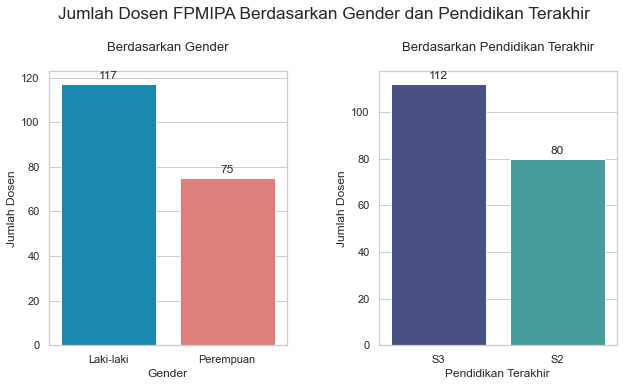

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5.8))
fig.tight_layout()
fig.tight_layout(pad=5)

custom_cmap = LinearSegmentedColormap.from_list('custom_camp', ['#f07167', '#0096c7'], N=100)
custom_cmap2 = LinearSegmentedColormap.from_list('custom_camp2', ['#505484', '#489c9c'], N=100)

colors = ["#0096c7", "#f07167", "#1ac938"]

custom_palette1 = sns.set_palette(sns.color_palette(colors))

colors2 = ['#495084']
cus_col = sns.color_palette(colors2)

fig.suptitle("Jumlah Dosen FPMIPA Berdasarkan Gender dan Pendidikan Terakhir"
             , fontsize = 'x-large', fontweight = 'normal', y=1)

gender = sns.countplot(x='Jenis Kelamin', data = df, palette=custom_palette1, ax=axes[0])
pend = sns.countplot(x='Pendidikan Terakhir', data = df, palette="mako", ax=axes[1])

gender.set_title('Berdasarkan Gender',fontweight="normal", size=13, y=1.05)
gender.set_xlabel('Gender', fontsize = 12)
gender.set_ylabel('Jumlah Dosen')


pend.set_title('Berdasarkan Pendidikan Terakhir',fontweight="normal", size=13, y=1.05)
pend.set_xlabel('Pendidikan Terakhir', fontsize = 12)
pend.set_ylabel('Jumlah Dosen')

# gender.text(0,-28,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")
# pend.text(0,-28,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")


# tampilkan value 
for container in gender.containers:
    gender.bar_label(container, padding=3)
    
for container in pend.containers:
    pend.bar_label(container, padding=3)
    
plt.show()

## Jumlah Dosen FPMIPA Berdasarkan Jabatan Fungsional

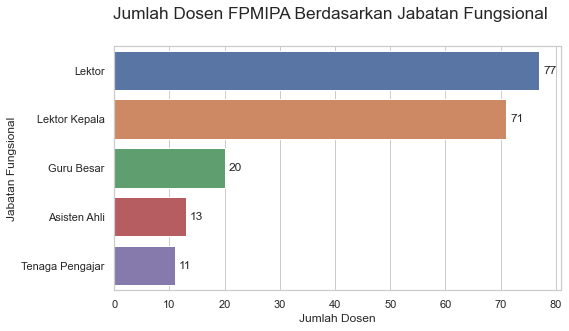

In [3]:
plt.figure(figsize=(8, 4.5))

# deklarasi countplot dengan x sebagai kolom 'Jabatan Fungsional', kemudian diurutkan
g = sns.countplot(y="Jabatan Fungsional", data = df, order = df['Jabatan Fungsional'].value_counts().index, palette="deep")
g.set(ylabel='Jabatan Fungsional', xlabel='Jumlah Dosen')
plt.suptitle("Jumlah Dosen FPMIPA Berdasarkan Jabatan Fungsional" , fontsize = 'x-large', fontweight = 'regular', y=1)
# g.text(0, 5.9,'Diurutkan berdasarkan jumlah dosen', fontstyle="normal", fontweight="normal")


# tampilkan value
for container in g.containers:
    g.bar_label(container, padding=4)

## Jumlah Dosen FPMIPA Berdasarkan Golongan

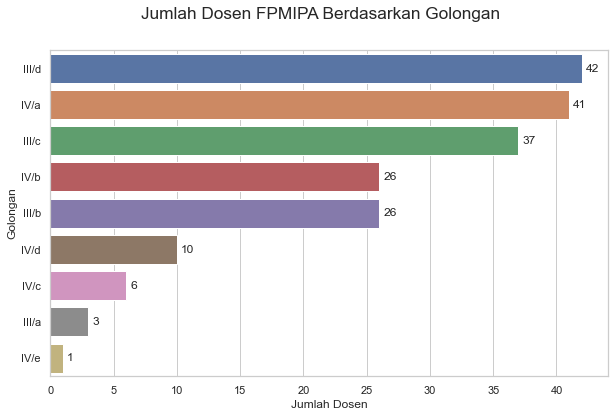

In [4]:
plt.figure(figsize=(10, 6))

# deklarasi countplot dengan x sebagai kolom 'Gol', kemudian diurutkan
g = sns.countplot(y="Gol", data = df, order = df['Gol'].value_counts().index, palette="deep")
g.set(ylabel='Golongan', xlabel='Jumlah Dosen')
# g.text(0, 10.5,'Diurutkan berdasarkan jumlah dosen', fontstyle="normal", fontweight="regular")
plt.suptitle("Jumlah Dosen FPMIPA Berdasarkan Golongan" , fontsize = 'x-large', fontweight = 'regular', y=0.98)

# tampilkan value
for container in g.containers:
    g.bar_label(container, padding=4)

## Jumlah Dosen FPMIPA Setiap Program Studi

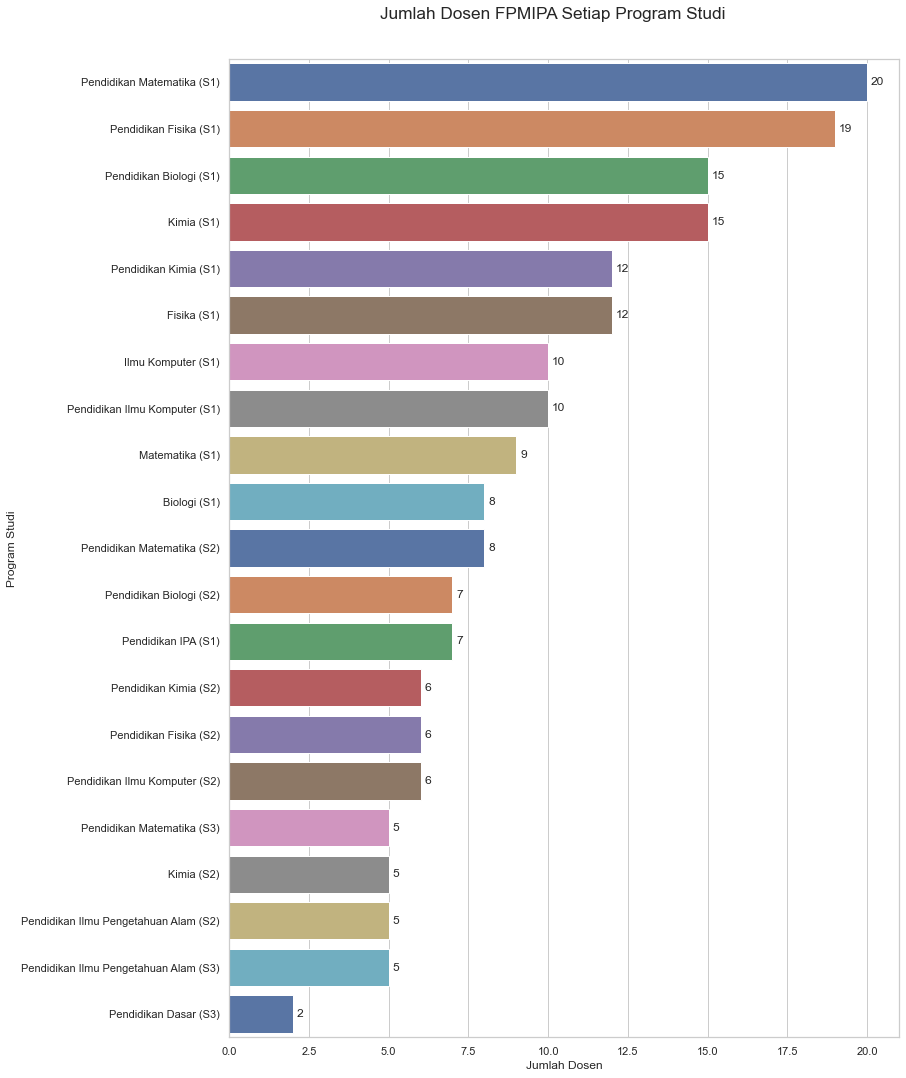

In [5]:
plt.figure(figsize=(12, 18))

# deklarasi countplot dengan y sebagai kolom 'Fakultas', kemudian diurutkan
g = sns.countplot(y="Nama Prodi", data=df, order = df['Nama Prodi'].value_counts().index, palette="deep")
g.set(xlabel='Jumlah Dosen', ylabel='Program Studi')
plt.suptitle("Jumlah Dosen FPMIPA Setiap Program Studi" , fontsize = 'x-large', fontweight = 'regular', y=0.92)
# g.text(0, 22, 'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

# tampilkan value
for container in g.containers:
    g.bar_label(container, padding=4)

## Perbandingan Persentase Jumlah Dosen Berdasarkan Gender, Program Studi Sarjana FPMIPA

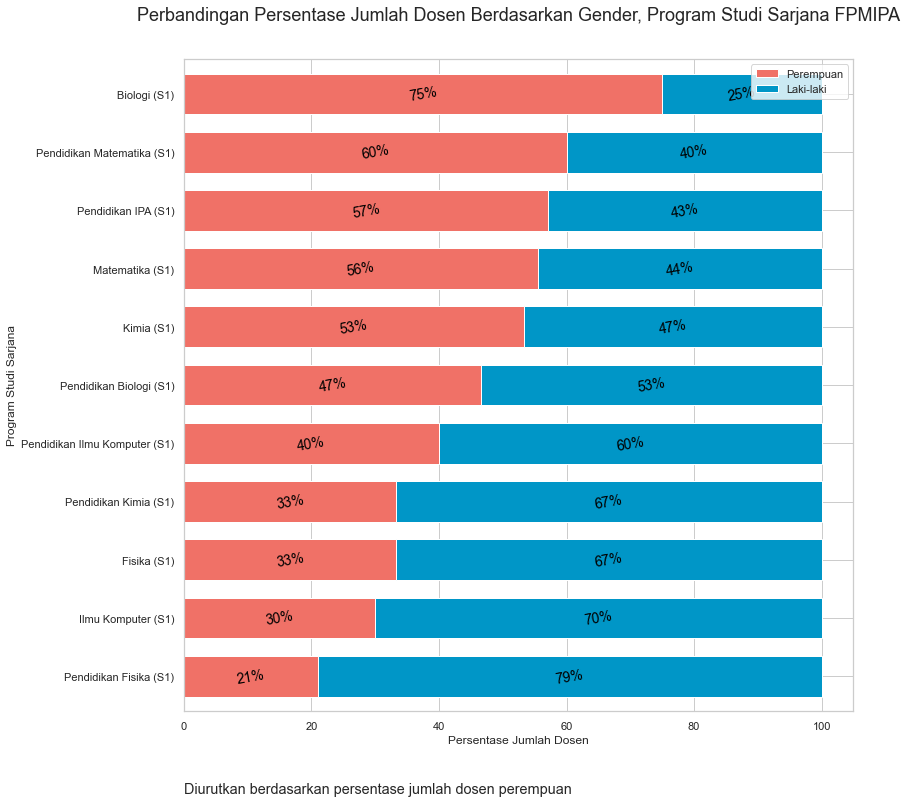

In [6]:
df_s1 = df[df["Nama Prodi"].str.contains("S1") == True]
df_s2 = df[df["Nama Prodi"].str.contains("S2") == True]
df_s3 = df[df["Nama Prodi"].str.contains("S3") == True]

df_p = df_s1[df_s1['Jenis Kelamin'] == 'Perempuan']
df_l = df_s1[df_s1['Jenis Kelamin'] == 'Laki-laki']
# df_ss1 = df_w.groupby(['Nama Prodi'])
df_p1 = df_p.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_l1 = df_l.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()

df_p1.rename(columns = {'Kode Prodi':'Jumlah Perempuan'}, inplace = True)
df_l1.rename(columns = {'Kode Prodi':'Jumlah Laki-laki'}, inplace = True)

df_final = (pd.merge(df_p1, df_l1, how='left'))

df_final["Jumlah"] = df_final["Jumlah Perempuan"] + df_final["Jumlah Laki-laki"]
df_final["Perempuan"] = ((df_final["Jumlah Perempuan"] / df_final["Jumlah"]) * 100)
df_final["Laki-laki"] = ((df_final["Jumlah Laki-laki"] / df_final["Jumlah"]) * 100)
df_final = df_final.drop(columns=['Jumlah Perempuan', 'Jumlah Laki-laki', 'Jumlah'])


df_final = df_final.sort_values(by="Perempuan", ascending=True)

plt.rcParams["figure.figsize"] = (12, 12)

df_final.plot(
  x = 'Nama Prodi', width=0.7,
  kind = 'barh', 
  stacked = True, cmap=custom_cmap, 
  mark_right = True)
  
df_total = df_final["Laki-laki"] + df_final["Perempuan"]
df_rel = df_final[df_final.columns[1:]].div(df_total, 0) * 100
  
    
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_final.iloc[:, 1:].cumsum(1)[n], 
                                         df_final[n], df_rel[n])):
        if pc != 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 0).astype(int)) + '%', 
                 va = 'center', ha = 'center', rotation = 10, fontsize = 14, color='black')
plt.title("Perbandingan Persentase Jumlah Dosen Berdasarkan Gender, Program Studi Sarjana FPMIPA", size=18, y=1.05)
plt.xlabel("Persentase Jumlah Dosen")
plt.ylabel("Program Studi Sarjana")

plt.text(0,-2,'Diurutkan berdasarkan persentase jumlah dosen perempuan', fontstyle="normal", fontweight="normal", fontsize="large")
# plt.text(0,-2.4,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.show()

## Perbandingan Persentase Jumlah Dosen Berdasarkan Gender, Program Studi Pascasarjana FPMIPA

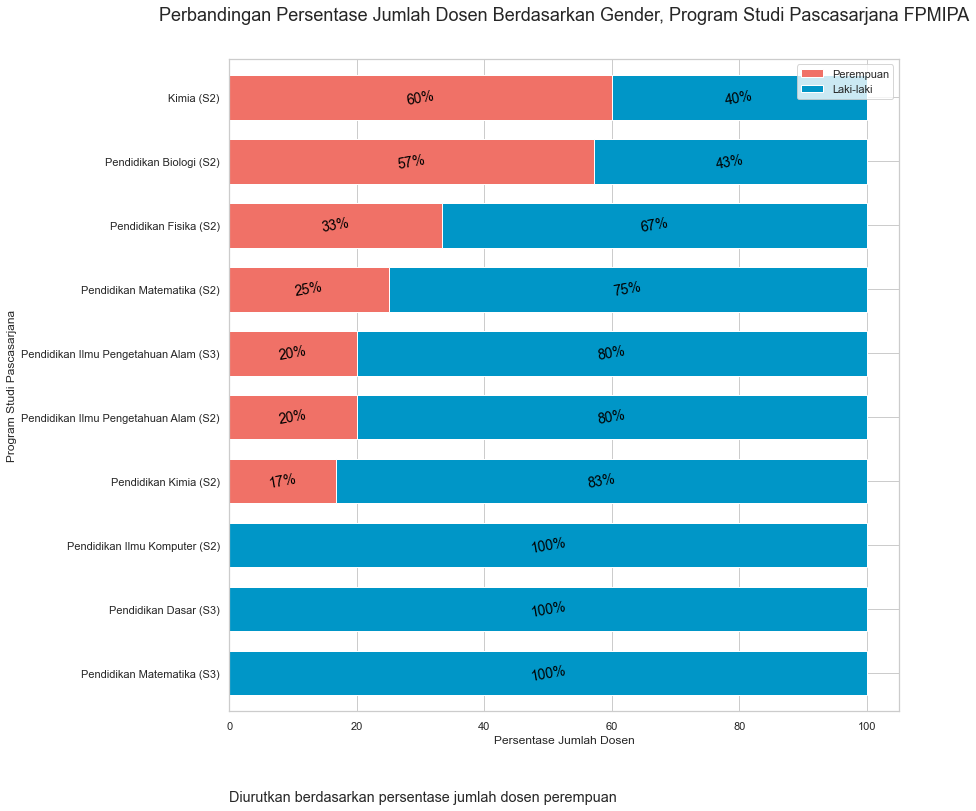

In [7]:
# df_profesi = df[df["Nama Prodi"].str.contains("Profesi") == True]

df_concat1 = pd.concat([df_s2, df_s3], ignore_index=True)
# df_concat2 = pd.concat([df_concat1, df_profesi], ignore_index=True)

df_pgab = df_concat1[df_concat1['Jenis Kelamin'] == 'Perempuan']
df_lgab = df_concat1[df_concat1['Jenis Kelamin'] == 'Laki-laki']
# df_ss1 = df_w.groupby(['Nama Prodi'])
df_pgab1_temp = df_pgab.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_lgab1 = df_lgab.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()

added_gab = [['Pendidikan Matematika (S3)', 0], ['Pendidikan Dasar (S3)', 0], 
            ['Pendidikan Ilmu Komputer (S2)', 0]]
df_added_gab = pd.DataFrame(added_gab, columns=['Nama Prodi', 'Kode Prodi'])

df_pgab1 = pd.concat([df_pgab1_temp, df_added_gab], ignore_index=True)

# df_pgab1.head(100)

df_pgab1.rename(columns = {'Kode Prodi':'Jumlah Perempuan'}, inplace = True)
df_lgab1.rename(columns = {'Kode Prodi':'Jumlah Laki-laki'}, inplace = True)

df_final2 = (pd.merge(df_pgab1, df_lgab1, how='left'))

df_final2["Jumlah"] = df_final2["Jumlah Perempuan"] + df_final2["Jumlah Laki-laki"]
df_final2["Perempuan"] = ((df_final2["Jumlah Perempuan"] / df_final2["Jumlah"]) * 100)
df_final2["Laki-laki"] = ((df_final2["Jumlah Laki-laki"] / df_final2["Jumlah"]) * 100)
df_final2 = df_final2.drop(columns=['Jumlah Perempuan', 'Jumlah Laki-laki', 'Jumlah'])


df_final2 = df_final2.sort_values(by="Perempuan", ascending=True)

plt.rcParams["figure.figsize"] = (12, 12)

df_final2.plot(
  x = 'Nama Prodi', width=0.7,
  kind = 'barh', 
  stacked = True, cmap=custom_cmap, 
  mark_right = True)
  
df_total2 = df_final2["Laki-laki"] + df_final2["Perempuan"]
df_rel2 = df_final2[df_final2.columns[1:]].div(df_total2, 0) * 100
  
    
for n in df_rel2:
    for i, (cs, ab, pc) in enumerate(zip(df_final2.iloc[:, 1:].cumsum(1)[n], 
                                         df_final2[n], df_rel2[n])):
        if pc != 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 0).astype(int)) + '%', 
                 va = 'center', ha = 'center', rotation = 10, fontsize = 14, color='black')
plt.title("Perbandingan Persentase Jumlah Dosen Berdasarkan Gender, Program Studi Pascasarjana FPMIPA", size=18, y=1.05)
plt.xlabel("Persentase Jumlah Dosen")
plt.ylabel("Program Studi Pascasarjana")

plt.text(0,-2,'Diurutkan berdasarkan persentase jumlah dosen perempuan', fontstyle="normal", fontweight="normal", fontsize="large")
# plt.text(0,-2.4,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.show()

## Jumlah Dosen Berdasarkan Gender Setiap Program Studi FPMIPA

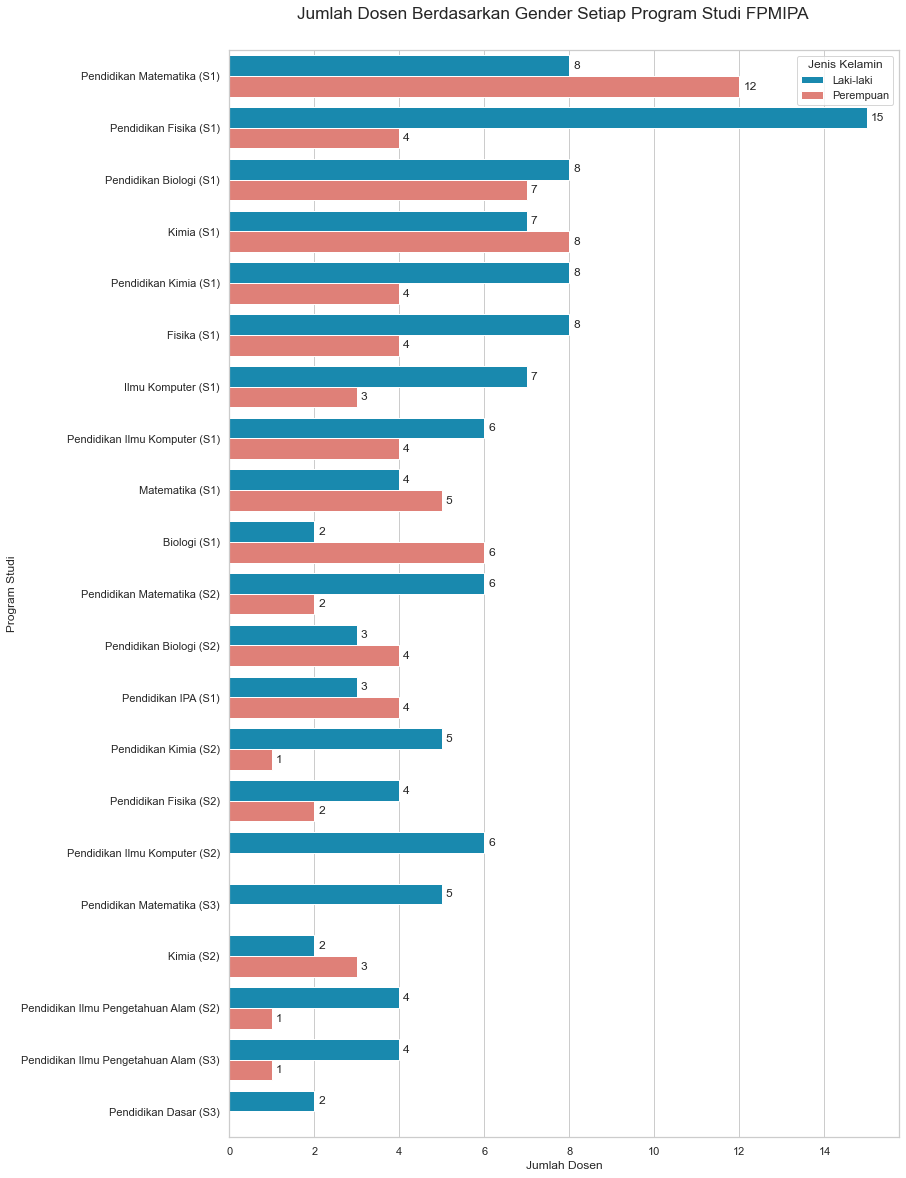

In [8]:
plt.figure(figsize=(12, 20))

# deklarasi countplot dengan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin', dan diurutkan
g = sns.countplot(y="Nama Prodi", hue="Jenis Kelamin", data=df, order=df['Nama Prodi'].value_counts().index, palette=custom_palette1)
g.set(xlabel='Jumlah Dosen', ylabel='Program Studi')
plt.suptitle("Jumlah Dosen Berdasarkan Gender Setiap Program Studi FPMIPA", y=0.91, fontsize = 'x-large', fontweight = 'regular')
# g.text(0, 21.8,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

# tampilkan value
for container in g.containers:
    g.bar_label(container, padding=4)

## Perbandingan Persentase Jumlah Dosen Berdasarkan Pendidikan Terakhir, Program Studi Sarjana FPMIPA

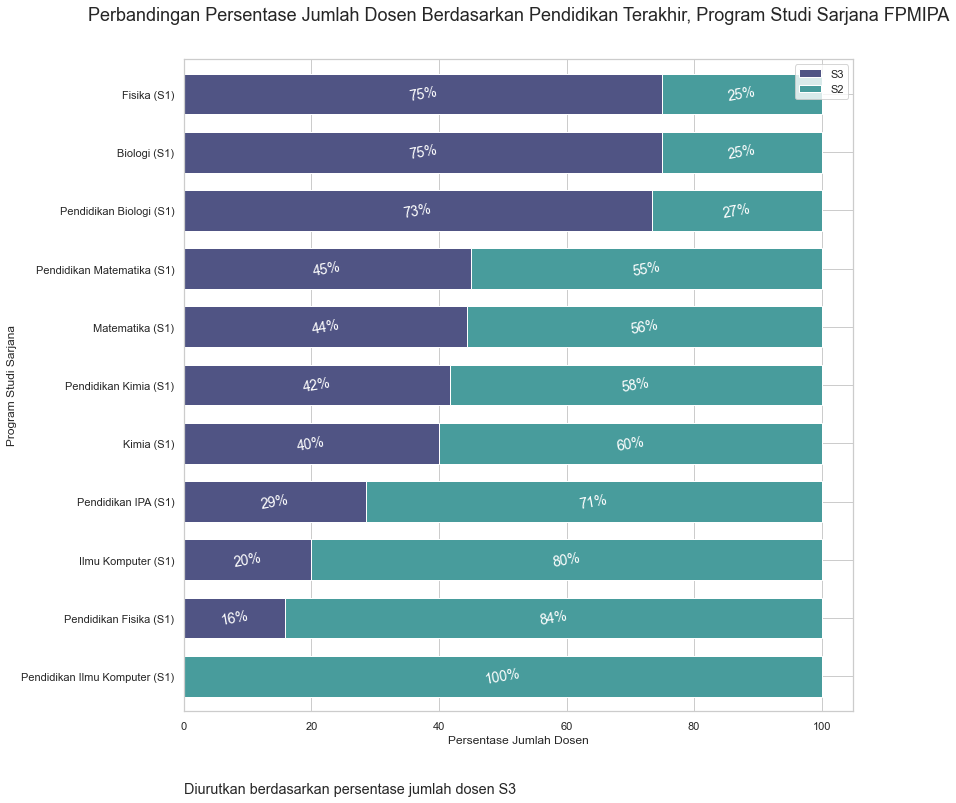

In [34]:
# df_ss1 = df_s1.groupby('Nama Prodi')['nama'].counts()
df_S2 = df_s1[df_s1['Pendidikan Terakhir'] == 'S2']
df_S3 = df_s1[df_s1['Pendidikan Terakhir'] == 'S3']
# df_ss1 = df_w.groupby(['Nama Prodi'])
df_sdua = df_S2.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_stiga_temp = df_S3.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()

added = [['Pendidikan Ilmu Komputer (S1)', 0]]
df_added = pd.DataFrame(added, columns=['Nama Prodi', 'Kode Prodi'])

# df_added.head(50)

df_stiga = pd.concat([df_stiga_temp, df_added], ignore_index=True)

# df_stiga.head(50)
df_sdua.rename(columns = {'Kode Prodi':'Jumlah S2'}, inplace = True)
df_stiga.rename(columns = {'Kode Prodi':'Jumlah S3'}, inplace = True)

df_finals = (pd.merge(df_stiga, df_sdua, how='left'))

df_finals["Jumlah"] = df_finals["Jumlah S2"] + df_finals["Jumlah S3"]
df_finals["S3"] = ((df_finals["Jumlah S3"] / df_finals["Jumlah"]) * 100)
df_finals["S2"] = ((df_finals["Jumlah S2"] / df_finals["Jumlah"]) * 100)


df_finals = df_finals.drop(columns=['Jumlah S2', 'Jumlah S3', 'Jumlah'])


df_finals = df_finals.sort_values(by="S3", ascending=True)

plt.rcParams["figure.figsize"] = (12, 12)

df_finals.plot(
  x = 'Nama Prodi', width=0.7,
  kind = 'barh', 
  stacked = True, cmap=custom_cmap2, 
  mark_right = True)
  
df_total2 = df_finals["S2"] + df_finals["S3"]
df_rel2 = df_finals[df_finals.columns[1:]].div(df_total2, 0) * 100
  
    
for n in df_rel2:
    for i, (cs, ab, pc) in enumerate(zip(df_finals.iloc[:, 1:].cumsum(1)[n], 
                                         df_finals[n], df_rel2[n])):
        if pc != 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 0).astype(int)) + '%', 
                 va = 'center', ha = 'center', rotation = 10, fontsize = 14, color='white')
plt.title("Perbandingan Persentase Jumlah Dosen Berdasarkan Pendidikan Terakhir, Program Studi Sarjana FPMIPA", size=18, y=1.05)
plt.xlabel("Persentase Jumlah Dosen")
plt.ylabel("Program Studi Sarjana")

plt.text(0,-2,'Diurutkan berdasarkan persentase jumlah dosen S3', fontstyle="normal", fontweight="normal", fontsize="large")
# plt.text(0,-2.4,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.show()

## Jumlah Dosen Berdasarkan Pendidikan Terakhir Setiap Program Studi FPMIPA

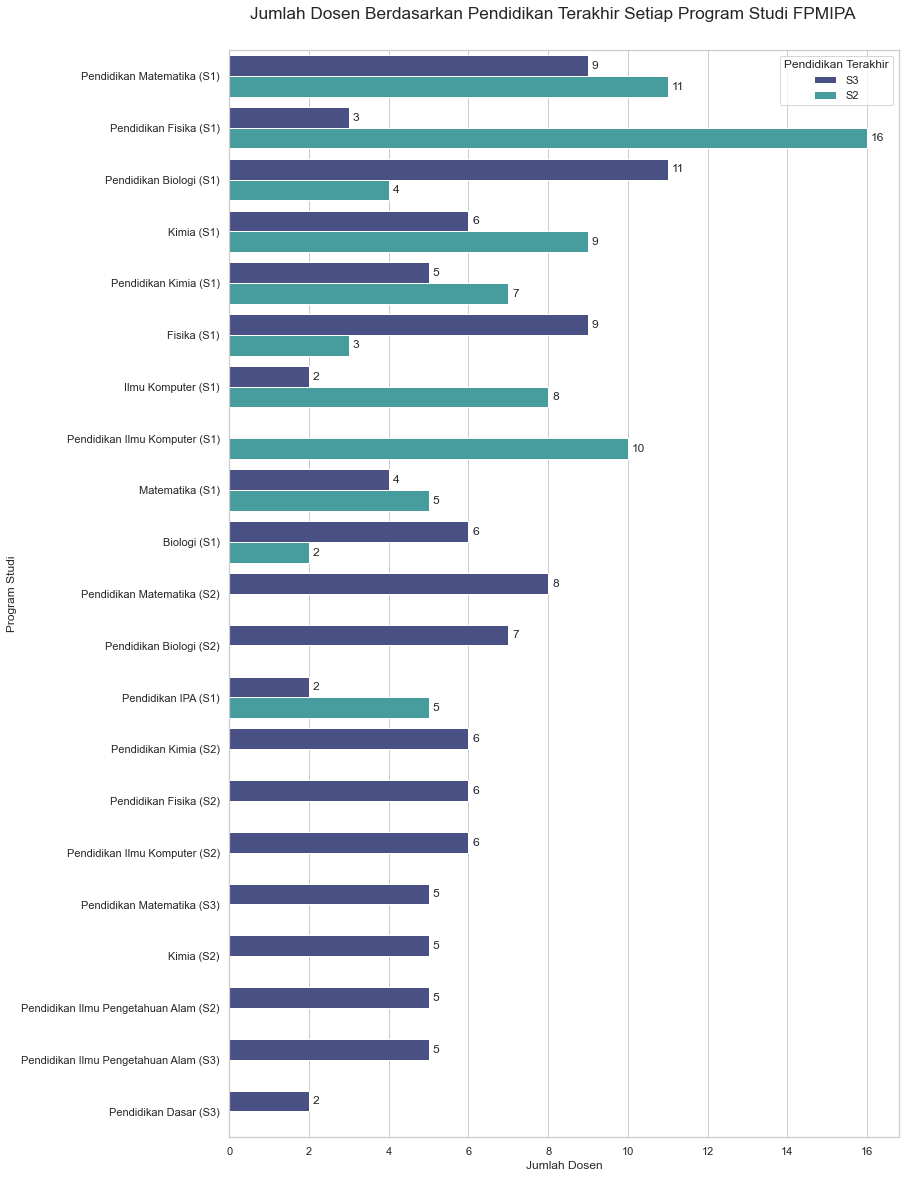

In [10]:
plt.figure(figsize=(12, 20))

# deklarasi countplot dengan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin', dan diurutkan
g = sns.countplot(y="Nama Prodi", hue="Pendidikan Terakhir", data=df, order=df['Nama Prodi'].value_counts().index, palette="mako")
g.set(xlabel='Jumlah Dosen', ylabel='Program Studi')
plt.suptitle("Jumlah Dosen Berdasarkan Pendidikan Terakhir Setiap Program Studi FPMIPA", y=0.91, fontsize = 'x-large', fontweight = 'regular')
# g.text(0, 21.8,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

# tampilkan value
for container in g.containers:
    g.bar_label(container, padding=4)

## Perbandingan Persentase Jumlah Dosen Berdasarkan Jabatan Fungsional, Program Studi Sarjana FPMIPA

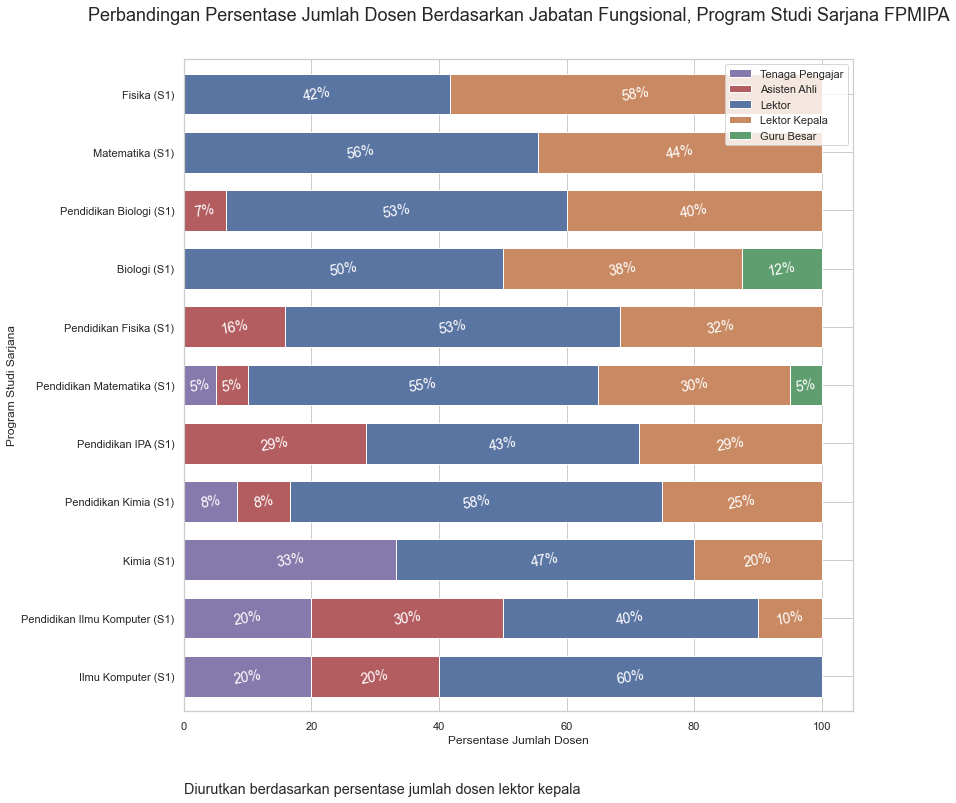

In [11]:
custom_cmap3 = LinearSegmentedColormap.from_list('custom_camp3', ['#857aab', '#b55d60', '#5975a4', '#cc8963', '#5f9e6e'], N=100)

temp_tp = df_s1[df_s1['Jabatan Fungsional'] == 'Tenaga Pengajar']
temp_ast = df_s1[df_s1['Jabatan Fungsional'] == 'Asisten Ahli']
temp_lek = df_s1[df_s1['Jabatan Fungsional'] == 'Lektor']
temp_lk = df_s1[df_s1['Jabatan Fungsional'] == 'Lektor Kepala']
temp_gb = df_s1[df_s1['Jabatan Fungsional'] == 'Guru Besar']

# temp_lk['Kode Prodi'] = temp_lk['Kode Prodi'].fillna(0)
# temp_lk.fillna(0)

# temp_lek.head(100)
df_tp_temp = temp_tp.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_ast_temp = temp_ast.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_lek = temp_lek.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_lk_temp = temp_lk.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_gb_temp = temp_gb.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()


df_tp_temp.head(200)

# df_lk_temp['Kode Prodi'] = df_lk_temp['Kode Prodi'].fillna(0)

added_jab1 = [['Ilmu Komputer (S1)', 0]]
added_jab2 = [['Ilmu Komputer (S1)', 0], ['Pendidikan Ilmu Komputer (S1)', 0], ['Pendidikan IPA (S1)', 0], ['Matematika (S1)', 0], 
             ['Kimia (S1)', 0], ['Pendidikan Biologi (S1)', 0], ['Pendidikan Kimia (S1)', 0], ['Fisika (S1)', 0], ['Pendidikan Fisika (S1)', 0]]
added_jab3 = [['Biologi (S1)', 0], ['Matematika (S1)', 0], ['Kimia (S1)', 0], ['Fisika (S1)', 0]]
added_jab4 = [['Biologi (S1)', 0], ['Pendidikan IPA (S1)', 0], ['Matematika (S1)', 0], ['Pendidikan Biologi (S1)', 0],
             ['Fisika (S1)', 0], ['Pendidikan Fisika (S1)', 0]]

df_added_jab1 = pd.DataFrame(added_jab1, columns=['Nama Prodi', 'Kode Prodi'])
df_added_jab2 = pd.DataFrame(added_jab2, columns=['Nama Prodi', 'Kode Prodi'])
df_added_jab3 = pd.DataFrame(added_jab3, columns=['Nama Prodi', 'Kode Prodi'])
df_added_jab4 = pd.DataFrame(added_jab4, columns=['Nama Prodi', 'Kode Prodi'])

# # # df_added_jab1.head(50)

df_lk = pd.concat([df_lk_temp, df_added_jab1], ignore_index=True)
df_gb = pd.concat([df_gb_temp, df_added_jab2], ignore_index=True)
df_ast = pd.concat([df_ast_temp, df_added_jab3], ignore_index=True)
df_tp = pd.concat([df_tp_temp, df_added_jab4], ignore_index=True)



df_lk.rename(columns = {'Kode Prodi':'Jumlah Lektor Kepala'}, inplace = True)
df_lek.rename(columns = {'Kode Prodi':'Jumlah Lektor'}, inplace = True)
df_gb.rename(columns = {'Kode Prodi':'Jumlah Guru Besar'}, inplace = True)
df_ast.rename(columns = {'Kode Prodi':'Jumlah Asisten Ahli'}, inplace = True)
df_tp.rename(columns = {'Kode Prodi':'Jumlah Tenaga Pengajar'}, inplace = True)

# df_lk.head(100)
df_final_jab1 = (pd.merge(df_tp, df_ast, how='left'))
df_final_jab2 = (pd.merge(df_final_jab1, df_lek, how='left'))
df_final_jab3 = (pd.merge(df_final_jab2, df_lk, how='left'))
df_final_jab = (pd.merge(df_final_jab3, df_gb, how='left'))


df_final_jab["Jumlah"] = df_final_jab["Jumlah Lektor Kepala"] + df_final_jab["Jumlah Lektor"] + df_final_jab["Jumlah Guru Besar"] + df_final_jab["Jumlah Asisten Ahli"] + df_final_jab["Jumlah Tenaga Pengajar"]
df_final_jab["Tenaga Pengajar"] = ((df_final_jab["Jumlah Tenaga Pengajar"] / df_final_jab["Jumlah"]) * 100)
df_final_jab["Asisten Ahli"] = ((df_final_jab["Jumlah Asisten Ahli"] / df_final_jab["Jumlah"]) * 100)
df_final_jab["Lektor"] = ((df_final_jab["Jumlah Lektor"] / df_final_jab["Jumlah"]) * 100)
df_final_jab["Lektor Kepala"] = ((df_final_jab["Jumlah Lektor Kepala"] / df_final_jab["Jumlah"]) * 100)
df_final_jab["Guru Besar"] = ((df_final_jab["Jumlah Guru Besar"] / df_final_jab["Jumlah"]) * 100)
df_final_jab = df_final_jab.drop(columns=['Jumlah Lektor Kepala', 'Jumlah Lektor', 'Jumlah Guru Besar', 'Jumlah Asisten Ahli', 
                                  'Jumlah Tenaga Pengajar', 'Jumlah'])

df_final_jab = df_final_jab.sort_values(by="Lektor Kepala", ascending=True)
# df_final_jab.head(20)

plt.rcParams["figure.figsize"] = (12, 12)

df_final_jab.plot(
  x = 'Nama Prodi', width=0.7,
  kind = 'barh', 
  stacked = True, cmap=custom_cmap3, 
  mark_right = True)
  
df_total_jab = df_final_jab["Lektor Kepala"] + df_final_jab["Lektor"] + df_final_jab["Guru Besar"] + df_final_jab["Asisten Ahli"] + df_final_jab["Tenaga Pengajar"]
df_rel_jab = df_final_jab[df_final_jab.columns[1:]].div(df_total_jab, 0) * 100

for n in df_rel_jab:
    for i, (cs, ab, pc) in enumerate(zip(df_final_jab.iloc[:, 1:].cumsum(1)[n], 
                                         df_final_jab[n], df_rel_jab[n])):
        if pc != 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 0).astype(int)) + '%', 
                 va = 'center', ha = 'center', rotation = 10, fontsize = 14, color='white')
plt.title("Perbandingan Persentase Jumlah Dosen Berdasarkan Jabatan Fungsional, Program Studi Sarjana FPMIPA", size=18, y=1.05)
plt.xlabel("Persentase Jumlah Dosen")
plt.ylabel("Program Studi Sarjana")

plt.text(0,-2,'Diurutkan berdasarkan persentase jumlah dosen lektor kepala', fontstyle="normal", fontweight="normal", fontsize="large")
# plt.text(0,-2.4,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.show()

## Perbandingan Persentase Jumlah Dosen Berdasarkan Jabatan Fungsional, Program Studi Pascasarjana FPMIPA

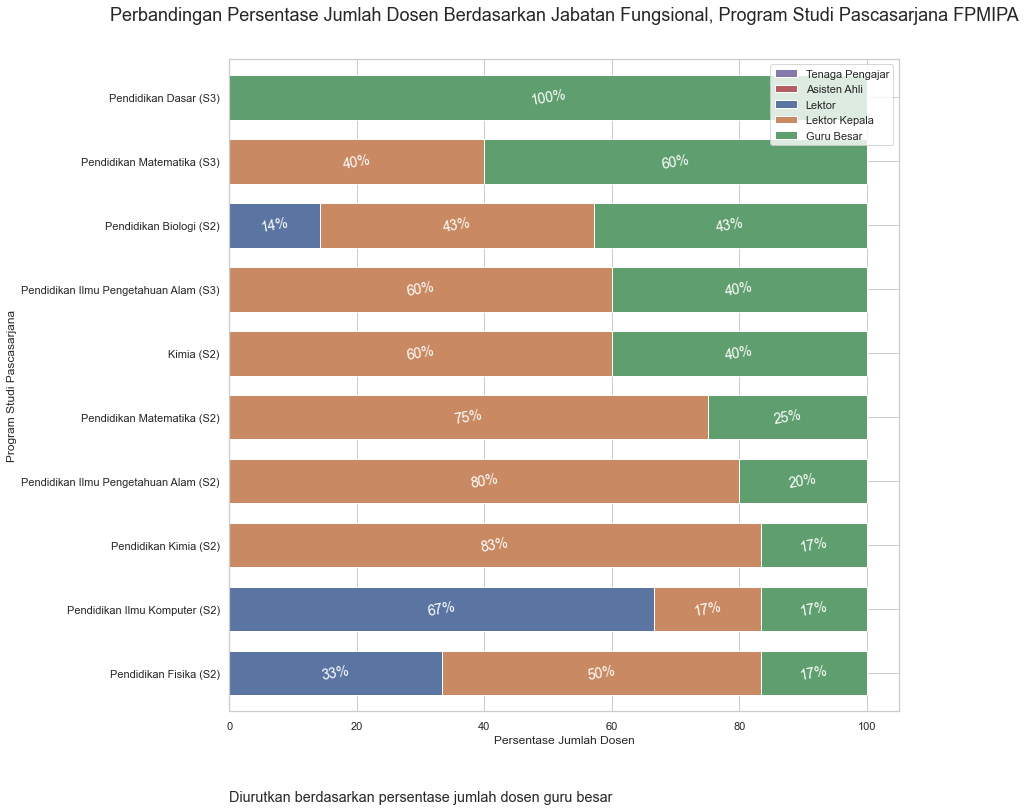

In [12]:
temp_lk = df_concat1[df_concat1['Jabatan Fungsional'] == 'Lektor Kepala']
temp_lek = df_concat1[df_concat1['Jabatan Fungsional'] == 'Lektor']
temp_gb = df_concat1[df_concat1['Jabatan Fungsional'] == 'Guru Besar']
temp_ast = df_concat1[df_concat1['Jabatan Fungsional'] == 'Asisten Ahli']
temp_tp = df_concat1[df_concat1['Jabatan Fungsional'] == 'Tenaga Pengajar']

# temp_lk['Kode Prodi'] = temp_lk['Kode Prodi'].fillna(0)
# temp_lk.fillna(0)

# temp_lek.head(100)
df_lk_temp = temp_lk.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_lek_temp = temp_lek.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_gb_temp = temp_gb.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_ast_temp = temp_ast.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_tp_temp = temp_tp.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()

# df_tp_temp.head(200)

# df_lk_temp['Kode Prodi'] = df_lk_temp['Kode Prodi'].fillna(0)

added_jab1 = [['Pendidikan Dasar (S3)', 0]]
added_jab2 = [['Kimia (S2)', 0], ['Pendidikan Matematika (S2)', 0], ['Pendidikan Ilmu Pengetahuan Alam (S3)', 0], ['Pendidikan Ilmu Pengetahuan Alam (S2)', 0],
             ['Pendidikan Kimia (S2)', 0], ['Pendidikan Dasar (S3)', 0], ['Pendidikan Matematika (S3)', 0]]
added_jab3 = [['Kimia (S2)', 0], ['Pendidikan Biologi (S2)', 0], ['Pendidikan Fisika (S2)', 0], ['Pendidikan Matematika (S2)', 0], ['Pendidikan Ilmu Pengetahuan Alam (S3)', 0],
             ['Pendidikan Ilmu Pengetahuan Alam (S2)', 0], ['Pendidikan Kimia (S2)', 0], ['Pendidikan Ilmu Komputer (S2)', 0], ['Pendidikan Dasar (S3)', 0], ['Pendidikan Matematika (S3)', 0]]
added_jab4 = [['Kimia (S2)', 0], ['Pendidikan Biologi (S2)', 0], ['Pendidikan Fisika (S2)', 0], ['Pendidikan Matematika (S2)', 0], ['Pendidikan Ilmu Pengetahuan Alam (S3)', 0],
             ['Pendidikan Ilmu Pengetahuan Alam (S2)', 0], ['Pendidikan Kimia (S2)', 0], ['Pendidikan Ilmu Komputer (S2)', 0], ['Pendidikan Dasar (S3)', 0], ['Pendidikan Matematika (S3)', 0]]

df_added_jab1 = pd.DataFrame(added_jab1, columns=['Nama Prodi', 'Kode Prodi'])
df_added_jab2 = pd.DataFrame(added_jab2, columns=['Nama Prodi', 'Kode Prodi'])
df_added_jab3 = pd.DataFrame(added_jab3, columns=['Nama Prodi', 'Kode Prodi'])
df_added_jab4 = pd.DataFrame(added_jab4, columns=['Nama Prodi', 'Kode Prodi'])

# df_added_jab2.head(50)

df_lk = pd.concat([df_lk_temp, df_added_jab1], ignore_index=True)
df_lek = pd.concat([df_lek_temp, df_added_jab2], ignore_index=True)
df_gb = df_gb_temp
df_ast = pd.concat([df_ast_temp, df_added_jab3], ignore_index=True)
df_tp = pd.concat([df_tp_temp, df_added_jab4], ignore_index=True)

# df_gb.head(20)

df_lk.rename(columns = {'Kode Prodi':'Jumlah Lektor Kepala'}, inplace = True)
df_lek.rename(columns = {'Kode Prodi':'Jumlah Lektor'}, inplace = True)
df_gb.rename(columns = {'Kode Prodi':'Jumlah Guru Besar'}, inplace = True)
df_ast.rename(columns = {'Kode Prodi':'Jumlah Asisten Ahli'}, inplace = True)
df_tp.rename(columns = {'Kode Prodi':'Jumlah Tenaga Pengajar'}, inplace = True)

# # df_lk.head(100)
df_final_jab1 = (pd.merge(df_lk, df_lek, how='left'))
df_final_jab2 = (pd.merge(df_final_jab1, df_gb, how='left'))
df_final_jab3 = (pd.merge(df_final_jab2, df_ast, how='left'))
df_final_jab = (pd.merge(df_final_jab3, df_tp, how='left'))


df_final_jab["Jumlah"] = df_final_jab["Jumlah Lektor Kepala"] + df_final_jab["Jumlah Lektor"] + df_final_jab["Jumlah Guru Besar"] + df_final_jab["Jumlah Asisten Ahli"] + df_final_jab["Jumlah Tenaga Pengajar"]
df_final_jab["Tenaga Pengajar"] = ((df_final_jab["Jumlah Tenaga Pengajar"] / df_final_jab["Jumlah"]) * 100)
df_final_jab["Asisten Ahli"] = ((df_final_jab["Jumlah Asisten Ahli"] / df_final_jab["Jumlah"]) * 100)
df_final_jab["Lektor"] = ((df_final_jab["Jumlah Lektor"] / df_final_jab["Jumlah"]) * 100)
df_final_jab["Lektor Kepala"] = ((df_final_jab["Jumlah Lektor Kepala"] / df_final_jab["Jumlah"]) * 100)
df_final_jab["Guru Besar"] = ((df_final_jab["Jumlah Guru Besar"] / df_final_jab["Jumlah"]) * 100)
df_final_jab = df_final_jab.drop(columns=['Jumlah Lektor Kepala', 'Jumlah Lektor', 'Jumlah Guru Besar', 'Jumlah Asisten Ahli', 
                                  'Jumlah Tenaga Pengajar', 'Jumlah'])

df_final_jab = df_final_jab.sort_values(by="Guru Besar", ascending=True)
# # df_final_jab.head(20)

plt.rcParams["figure.figsize"] = (12, 12)

df_final_jab.plot(
  x = 'Nama Prodi', width=0.7,
  kind = 'barh', 
  stacked = True, cmap=custom_cmap3, 
  mark_right = True)
  
df_total_jab = df_final_jab["Lektor Kepala"] + df_final_jab["Lektor"] + df_final_jab["Guru Besar"] + df_final_jab["Asisten Ahli"] + df_final_jab["Tenaga Pengajar"]
df_rel_jab = df_final_jab[df_final_jab.columns[1:]].div(df_total_jab, 0) * 100
  
    
for n in df_rel_jab:
    for i, (cs, ab, pc) in enumerate(zip(df_final_jab.iloc[:, 1:].cumsum(1)[n], 
                                         df_final_jab[n], df_rel_jab[n])):
        if pc != 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 0).astype(int)) + '%', 
                 va = 'center', ha = 'center', rotation = 10, fontsize = 14, color='white')
plt.title("Perbandingan Persentase Jumlah Dosen Berdasarkan Jabatan Fungsional, Program Studi Pascasarjana FPMIPA", size=18, y=1.05)
plt.xlabel("Persentase Jumlah Dosen")
plt.ylabel("Program Studi Pascasarjana")

plt.text(0,-2,'Diurutkan berdasarkan persentase jumlah dosen guru besar', fontstyle="normal", fontweight="normal", fontsize="large")
# plt.text(0,-2.4,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.show()

## Perbandingan Persentase Jumlah Dosen Berdasarkan Golongan, Program Studi Sarjana FPMIPA

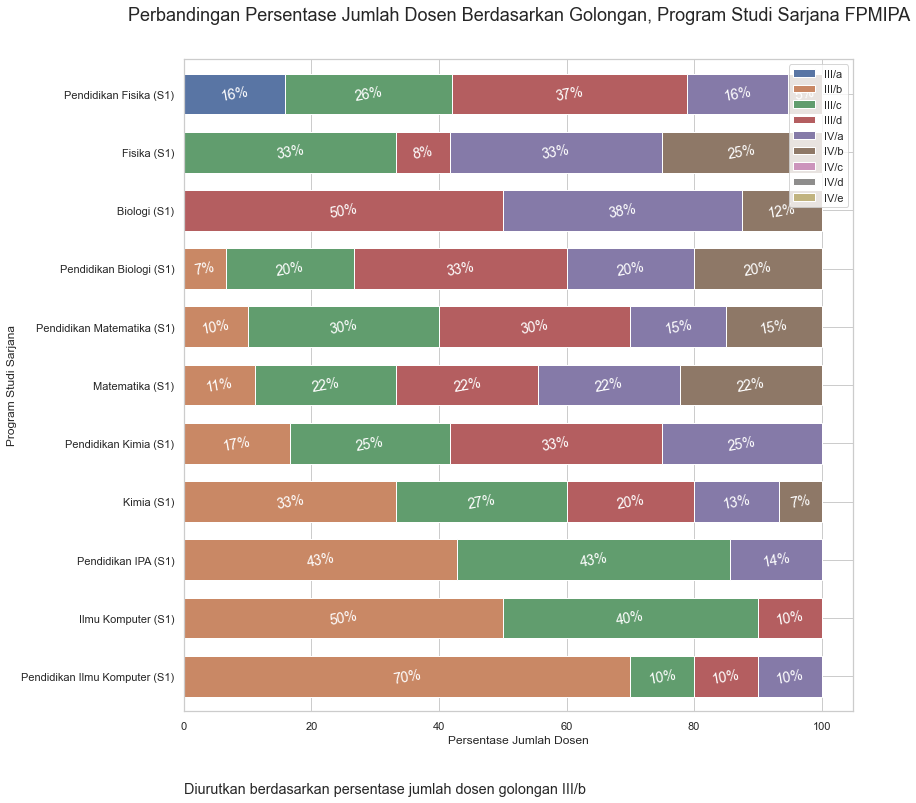

In [13]:
custom_cmap4 = LinearSegmentedColormap.from_list('custom_camp4', ['#5975a4', '#cc8963', '#5f9e6e', '#b55d60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f'], N=100)



temp_3a = df_s1[df_s1['Gol'] == 'III/a']
temp_3b = df_s1[df_s1['Gol'] == 'III/b']
temp_3c = df_s1[df_s1['Gol'] == 'III/c']
temp_3d = df_s1[df_s1['Gol'] == 'III/d']
temp_4a = df_s1[df_s1['Gol'] == 'IV/a']
temp_4b = df_s1[df_s1['Gol'] == 'IV/b']
temp_4c = df_s1[df_s1['Gol'] == 'IV/c']
temp_4d = df_s1[df_s1['Gol'] == 'IV/d']
temp_4e = df_s1[df_s1['Gol'] == 'IV/e']

# temp_3a.head(100)
df_3a_temp = temp_3a.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_3b_temp = temp_3b.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_3c_temp = temp_3c.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_3d_temp = temp_3d.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_4a_temp = temp_4a.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_4b_temp = temp_4b.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_4c_temp = temp_4c.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_4d_temp = temp_4d.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_4e_temp = temp_4e.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()

# df_4e_temp.head(200)

added_gol1 = [['Biologi (S1)', 0], ['Pendidikan Matematika (S1)', 0], ['Pendidikan IPA (S1)', 0], ['Matematika (S1)', 0], ['Kimia (S1)', 0], 
             ['Pendidikan Biologi (S1)', 0], ['Pendidikan Ilmu Komputer (S1)', 0], ['Pendidikan Kimia (S1)', 0], ['Fisika (S1)', 0], ['Ilmu Komputer (S1)', 0]]
added_gol2 = [['Biologi (S1)', 0], ['Fisika (S1)', 0], ['Pendidikan Fisika (S1)', 0]]
added_gol3 = [['Biologi (S1)', 0]]
added_gol4 = [['Pendidikan IPA (S1)', 0]]
added_gol5 = [['Ilmu Komputer (S1)', 0]]
added_gol6 = [['Ilmu Komputer (S1)', 0], ['Pendidikan Ilmu Komputer (S1)', 0], ['Pendidikan IPA (S1)', 0], ['Pendidikan Kimia (S1)', 0]]
added_gol7 = [['Kimia (S1)', 0], ['Pendidikan Kimia (S1)', 0], ['Fisika (S1)', 0], ['Pendidikan Fisika (S1)', 0], ['Biologi (S1)', 0], ['Pendidikan Biologi (S1)', 0],
             ['Matematika (S1)', 0], ['Pendidikan Matematika (S1)', 0], ['Ilmu Komputer (S1)', 0], ['Pendidikan Ilmu Komputer (S1)', 0], ['Pendidikan IPA (S1)', 0]]

df_added_gol1 = pd.DataFrame(added_gol1, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol2 = pd.DataFrame(added_gol2, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol3 = pd.DataFrame(added_gol3, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol4 = pd.DataFrame(added_gol4, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol5 = pd.DataFrame(added_gol5, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol6 = pd.DataFrame(added_gol6, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol7 = pd.DataFrame(added_gol7, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol8 = pd.DataFrame(added_gol7, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol9 = pd.DataFrame(added_gol7, columns=['Nama Prodi', 'Kode Prodi'])

# # df_added_jab2.head(50)

df_3a = pd.concat([df_3a_temp, df_added_gol1], ignore_index=True)
df_3b = pd.concat([df_3b_temp, df_added_gol2], ignore_index=True)
df_3c = pd.concat([df_3c_temp, df_added_gol3], ignore_index=True)
df_3d = pd.concat([df_3d_temp, df_added_gol4], ignore_index=True)
df_4a = pd.concat([df_4a_temp, df_added_gol5], ignore_index=True)
df_4b = pd.concat([df_4b_temp, df_added_gol6], ignore_index=True)
df_4c = pd.concat([df_4c_temp, df_added_gol7], ignore_index=True)
df_4d = pd.concat([df_4d_temp, df_added_gol8], ignore_index=True)
df_4e = pd.concat([df_4e_temp, df_added_gol9], ignore_index=True)

# df_4e.head(20)


df_3a.rename(columns = {'Kode Prodi':'Jumlah 3a'}, inplace = True)
df_3b.rename(columns = {'Kode Prodi':'Jumlah 3b'}, inplace = True)
df_3c.rename(columns = {'Kode Prodi':'Jumlah 3c'}, inplace = True)
df_3d.rename(columns = {'Kode Prodi':'Jumlah 3d'}, inplace = True)
df_4a.rename(columns = {'Kode Prodi':'Jumlah 4a'}, inplace = True)
df_4b.rename(columns = {'Kode Prodi':'Jumlah 4b'}, inplace = True)
df_4c.rename(columns = {'Kode Prodi':'Jumlah 4c'}, inplace = True)
df_4d.rename(columns = {'Kode Prodi':'Jumlah 4d'}, inplace = True)
df_4e.rename(columns = {'Kode Prodi':'Jumlah 4e'}, inplace = True)


# # # df_lk.head(100)
df_final_gol1 = (pd.merge(df_3b, df_3a, how='left'))
df_final_gol2 = (pd.merge(df_final_gol1, df_3c, how='left'))
df_final_gol3 = (pd.merge(df_final_gol2, df_3d, how='left'))
df_final_gol4 = (pd.merge(df_final_gol3, df_4a, how='left'))
df_final_gol5 = (pd.merge(df_final_gol4, df_4b, how='left'))
df_final_gol6 = (pd.merge(df_final_gol5, df_4c, how='left'))
df_final_gol7 = (pd.merge(df_final_gol6, df_4d, how='left'))
df_final_gol = (pd.merge(df_final_gol7, df_4e, how='left'))

# df_final_gol.head(20)

df_final_gol["Jumlah"] = df_final_gol["Jumlah 3a"] + df_final_gol["Jumlah 3b"] + df_final_gol["Jumlah 3c"] + df_final_gol["Jumlah 3d"] + df_final_gol["Jumlah 4a"] + df_final_gol["Jumlah 4b"] + df_final_gol["Jumlah 4c"] +df_final_gol["Jumlah 4d"] + df_final_gol["Jumlah 4e"]
df_final_gol["III/a"] = ((df_final_gol["Jumlah 3a"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["III/b"] = ((df_final_gol["Jumlah 3b"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["III/c"] = ((df_final_gol["Jumlah 3c"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["III/d"] = ((df_final_gol["Jumlah 3d"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["IV/a"] = ((df_final_gol["Jumlah 4a"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["IV/b"] = ((df_final_gol["Jumlah 4b"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["IV/c"] = ((df_final_gol["Jumlah 4c"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["IV/d"] = ((df_final_gol["Jumlah 4d"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["IV/e"] = ((df_final_gol["Jumlah 4e"] / df_final_gol["Jumlah"]) * 100)
df_final_gol = df_final_gol.drop(columns=['Jumlah', 'Jumlah 3a', 'Jumlah 3b', 'Jumlah 3c', 'Jumlah 3d', 'Jumlah 4a', 'Jumlah 4b', 'Jumlah 4c', 'Jumlah 4d', 'Jumlah 4e'])


# df_final_gol.head(100)
# gol = df_s1.groupby('Gol')["Usia"].mean().reset_index()
# gol = gol.sort_values(by="Gol", ascending=False)

df_final_gol = df_final_gol.sort_values(by="III/b", ascending=False)

plt.rcParams["figure.figsize"] = (12, 12)

df_final_gol.plot(
  x = 'Nama Prodi', width=0.7,
  kind = 'barh',
  stacked = True, cmap=custom_cmap4, 
  mark_right = True)
  
df_total_gol = df_final_gol["III/a"] + df_final_gol["III/b"] + df_final_gol["III/c"] + df_final_gol["III/d"] + df_final_gol["IV/a"] + df_final_gol["IV/b"] + df_final_gol["IV/c"] + df_final_gol["IV/d"] + df_final_gol["IV/e"]
df_rel_gol = df_final_gol[df_final_gol.columns[1:]].div(df_total_gol, 0) * 100

# df_rel_gol.head(12)
for n in df_rel_gol:
    for i, (cs, ab, pc) in enumerate(zip(df_final_gol.iloc[:, 1:].cumsum(1)[n], 
                                         df_final_gol[n], df_rel_gol[n])):
        if pc != 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 0).astype(int)) + '%', 
                 va = 'center', ha = 'center', rotation = 10, fontsize = 14, color='white')
plt.title("Perbandingan Persentase Jumlah Dosen Berdasarkan Golongan, Program Studi Sarjana FPMIPA", size=18, y=1.05)
plt.xlabel("Persentase Jumlah Dosen")
plt.ylabel("Program Studi Sarjana")

plt.text(0,-2,'Diurutkan berdasarkan persentase jumlah dosen golongan III/b', fontstyle="normal", fontweight="normal", fontsize="large")
# plt.text(0,-2.4,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.show()

## Perbandingan Persentase Jumlah Dosen Berdasarkan Golongan, Program Studi Pascasarjana FPMIPA

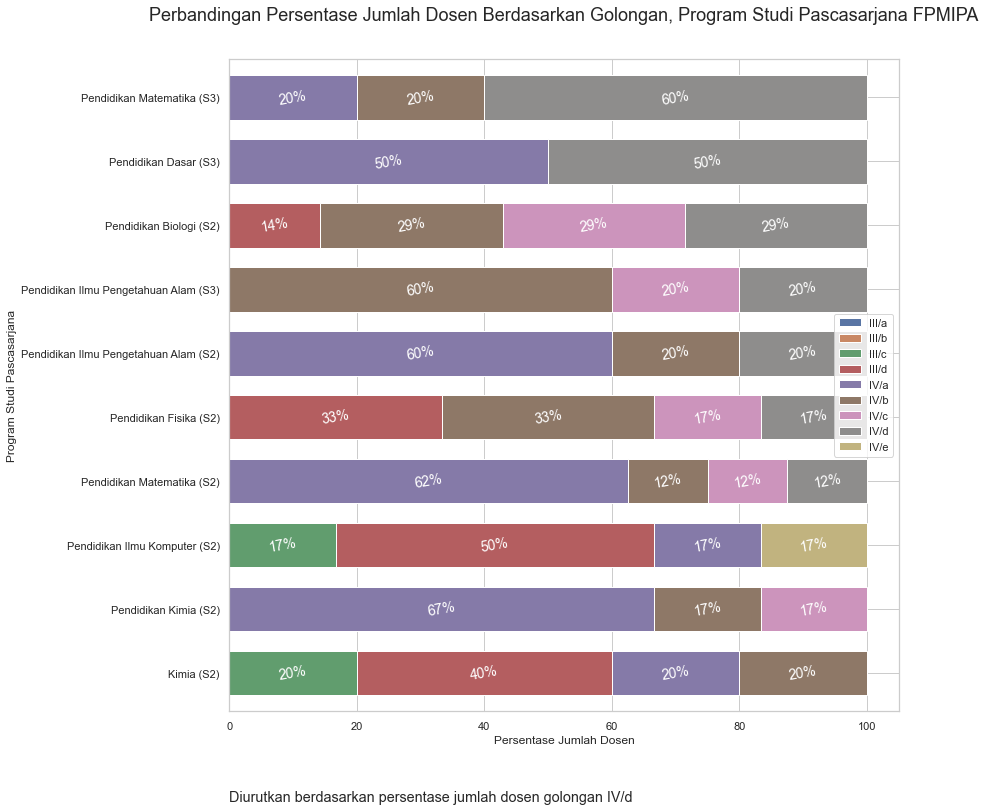

In [14]:
temp_3a = df_concat1[df_concat1['Gol'] == 'III/a']
temp_3b = df_concat1[df_concat1['Gol'] == 'III/b']
temp_3c = df_concat1[df_concat1['Gol'] == 'III/c']
temp_3d = df_concat1[df_concat1['Gol'] == 'III/d']
temp_4a = df_concat1[df_concat1['Gol'] == 'IV/a']
temp_4b = df_concat1[df_concat1['Gol'] == 'IV/b']
temp_4c = df_concat1[df_concat1['Gol'] == 'IV/c']
temp_4d = df_concat1[df_concat1['Gol'] == 'IV/d']
temp_4e = df_concat1[df_concat1['Gol'] == 'IV/e']

# temp_3a.head(100)
df_3a_temp = temp_3a.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_3b_temp = temp_3b.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_3c_temp = temp_3c.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_3d_temp = temp_3d.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_4a_temp = temp_4a.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_4b_temp = temp_4b.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_4c_temp = temp_4c.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_4d_temp = temp_4d.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()
df_4e_temp = temp_4e.groupby(['Nama Prodi'])['Kode Prodi'].count().reset_index()

# df_4e_temp.head(200)

added_gol1 = [['Kimia (S2)', 0], ['Pendidikan Kimia (S2)', 0], ['Pendidikan Biologi (S2)', 0], ['Pendidikan Fisika (S2)', 0], ['Pendidikan Matematika (S2)', 0], ['Pendidikan Ilmu Pengetahuan Alam (S2)', 0],
             ['Pendidikan Ilmu Pengetahuan Alam (S3)', 0], ['Pendidikan Ilmu Komputer (S2)', 0], ['Pendidikan Dasar (S3)', 0], ['Pendidikan Matematika (S3)', 0]]
added_gol2 = [['Pendidikan Kimia (S2)', 0], ['Pendidikan Biologi (S2)', 0], ['Pendidikan Fisika (S2)', 0], ['Pendidikan Matematika (S2)', 0], ['Pendidikan Ilmu Pengetahuan Alam (S2)', 0],
             ['Pendidikan Ilmu Pengetahuan Alam (S3)', 0], ['Pendidikan Dasar (S3)', 0], ['Pendidikan Matematika (S3)', 0]]
added_gol3 = [['Pendidikan Kimia (S2)', 0], ['Pendidikan Matematika (S2)', 0], ['Pendidikan Ilmu Pengetahuan Alam (S2)', 0],
             ['Pendidikan Ilmu Pengetahuan Alam (S3)', 0], ['Pendidikan Dasar (S3)', 0], ['Pendidikan Matematika (S3)', 0]]
added_gol4 = [['Pendidikan Biologi (S2)', 0], ['Pendidikan Fisika (S2)', 0], ['Pendidikan Ilmu Pengetahuan Alam (S3)', 0]]
added_gol5 = [['Pendidikan Dasar (S3)', 0], ['Pendidikan Ilmu Komputer (S2)', 0]]
added_gol6 = [['Kimia (S2)', 0], ['Pendidikan Ilmu Pengetahuan Alam (S2)', 0],
             ['Pendidikan Ilmu Komputer (S2)', 0], ['Pendidikan Dasar (S3)', 0], ['Pendidikan Matematika (S3)', 0]]
added_gol7 = [['Kimia (S2)', 0], ['Pendidikan Ilmu Komputer (S2)', 0], ['Pendidikan Kimia (S2)', 0]]
added_gol8 = [['Kimia (S2)', 0], ['Pendidikan Kimia (S2)', 0], ['Pendidikan Biologi (S2)', 0], ['Pendidikan Fisika (S2)', 0], ['Pendidikan Matematika (S2)', 0], ['Pendidikan Ilmu Pengetahuan Alam (S2)', 0],
             ['Pendidikan Ilmu Pengetahuan Alam (S3)', 0], ['Pendidikan Dasar (S3)', 0], ['Pendidikan Matematika (S3)', 0]]


df_added_gol1 = pd.DataFrame(added_gol1, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol2 = pd.DataFrame(added_gol1, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol3 = pd.DataFrame(added_gol2, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol4 = pd.DataFrame(added_gol3, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol5 = pd.DataFrame(added_gol4, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol6 = pd.DataFrame(added_gol5, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol7 = pd.DataFrame(added_gol6, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol8 = pd.DataFrame(added_gol7, columns=['Nama Prodi', 'Kode Prodi'])
df_added_gol9 = pd.DataFrame(added_gol8, columns=['Nama Prodi', 'Kode Prodi'])

# # df_added_jab2.head(50)

df_3a = pd.concat([df_3a_temp, df_added_gol1], ignore_index=True)
df_3b = pd.concat([df_3b_temp, df_added_gol2], ignore_index=True)
df_3c = pd.concat([df_3c_temp, df_added_gol3], ignore_index=True)
df_3d = pd.concat([df_3d_temp, df_added_gol4], ignore_index=True)
df_4a = pd.concat([df_4a_temp, df_added_gol5], ignore_index=True)
df_4b = pd.concat([df_4b_temp, df_added_gol6], ignore_index=True)
df_4c = pd.concat([df_4c_temp, df_added_gol7], ignore_index=True)
df_4d = pd.concat([df_4d_temp, df_added_gol8], ignore_index=True)
df_4e = pd.concat([df_4e_temp, df_added_gol9], ignore_index=True)

df_4e.head(20)


df_3a.rename(columns = {'Kode Prodi':'Jumlah 3a'}, inplace = True)
df_3b.rename(columns = {'Kode Prodi':'Jumlah 3b'}, inplace = True)
df_3c.rename(columns = {'Kode Prodi':'Jumlah 3c'}, inplace = True)
df_3d.rename(columns = {'Kode Prodi':'Jumlah 3d'}, inplace = True)
df_4a.rename(columns = {'Kode Prodi':'Jumlah 4a'}, inplace = True)
df_4b.rename(columns = {'Kode Prodi':'Jumlah 4b'}, inplace = True)
df_4c.rename(columns = {'Kode Prodi':'Jumlah 4c'}, inplace = True)
df_4d.rename(columns = {'Kode Prodi':'Jumlah 4d'}, inplace = True)
df_4e.rename(columns = {'Kode Prodi':'Jumlah 4e'}, inplace = True)


# # # # df_lk.head(100)
df_final_gol1 = (pd.merge(df_3b, df_3a, how='left'))
df_final_gol2 = (pd.merge(df_final_gol1, df_3c, how='left'))
df_final_gol3 = (pd.merge(df_final_gol2, df_3d, how='left'))
df_final_gol4 = (pd.merge(df_final_gol3, df_4a, how='left'))
df_final_gol5 = (pd.merge(df_final_gol4, df_4b, how='left'))
df_final_gol6 = (pd.merge(df_final_gol5, df_4c, how='left'))
df_final_gol7 = (pd.merge(df_final_gol6, df_4d, how='left'))
df_final_gol = (pd.merge(df_final_gol7, df_4e, how='left'))

# # df_final_gol.head(20)

df_final_gol["Jumlah"] = df_final_gol["Jumlah 3a"] + df_final_gol["Jumlah 3b"] + df_final_gol["Jumlah 3c"] + df_final_gol["Jumlah 3d"] + df_final_gol["Jumlah 4a"] + df_final_gol["Jumlah 4b"] + df_final_gol["Jumlah 4c"] +df_final_gol["Jumlah 4d"] + df_final_gol["Jumlah 4e"]
df_final_gol["III/a"] = ((df_final_gol["Jumlah 3a"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["III/b"] = ((df_final_gol["Jumlah 3b"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["III/c"] = ((df_final_gol["Jumlah 3c"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["III/d"] = ((df_final_gol["Jumlah 3d"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["IV/a"] = ((df_final_gol["Jumlah 4a"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["IV/b"] = ((df_final_gol["Jumlah 4b"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["IV/c"] = ((df_final_gol["Jumlah 4c"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["IV/d"] = ((df_final_gol["Jumlah 4d"] / df_final_gol["Jumlah"]) * 100)
df_final_gol["IV/e"] = ((df_final_gol["Jumlah 4e"] / df_final_gol["Jumlah"]) * 100)
df_final_gol = df_final_gol.drop(columns=['Jumlah', 'Jumlah 3a', 'Jumlah 3b', 'Jumlah 3c', 'Jumlah 3d', 'Jumlah 4a', 'Jumlah 4b', 'Jumlah 4c', 'Jumlah 4d', 'Jumlah 4e'])

df_final_gol = df_final_gol.sort_values(by="IV/d", ascending=True)

plt.rcParams["figure.figsize"] = (12, 12)

df_final_gol.plot(
  x = 'Nama Prodi', width=0.7,
  kind = 'barh', 
  stacked = True, cmap=custom_cmap4, 
  mark_right = True)
  
df_total_gol = df_final_gol["III/a"] + df_final_gol["III/b"] + df_final_gol["III/c"] + df_final_gol["III/d"] + df_final_gol["IV/a"] + df_final_gol["IV/b"] + df_final_gol["IV/c"] + df_final_gol["IV/d"] + df_final_gol["IV/e"]
df_rel_gol = df_final_gol[df_final_gol.columns[1:]].div(df_total_gol, 0) * 100

# df_rel_gol.head(12)
for n in df_rel_gol:
    for i, (cs, ab, pc) in enumerate(zip(df_final_gol.iloc[:, 1:].cumsum(1)[n], 
                                         df_final_gol[n], df_rel_gol[n])):
        if pc != 0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 0).astype(int)) + '%', 
                 va = 'center', ha = 'center', rotation = 10, fontsize = 14, color='white')
plt.title("Perbandingan Persentase Jumlah Dosen Berdasarkan Golongan, Program Studi Pascasarjana FPMIPA", size=18, y=1.05)
plt.xlabel("Persentase Jumlah Dosen")
plt.ylabel("Program Studi Pascasarjana")

plt.text(0,-2,'Diurutkan berdasarkan persentase jumlah dosen golongan IV/d', fontstyle="normal", fontweight="normal", fontsize="large")
# plt.text(0,-2.4,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.show()

# Usia Dosen FPMIPA

## Distribusi Usia Dosen FPMIPA

In [15]:
age_mean = df['Usia'].mean()
age_q1 = df['Usia'].quantile(0.25)
age_median = df['Usia'].median()
age_q3 = df['Usia'].quantile(0.75)
age_min = df['Usia'].min()
age_max = df['Usia'].max()
age_std = df['Usia'].std()

age_mean = np.round(age_mean, 0).astype(int)
age_q1 = np.round(age_q1, 0).astype(int)
age_median = np.round(age_median, 0).astype(int)
age_q3 = np.round(age_q3, 0).astype(int)
age_min = np.round(age_min, 0).astype(int)
age_max = np.round(age_max, 0).astype(int)
age_std = np.round(age_std, 0).astype(int)

dist_age = [['Mean', age_mean], ['Std', age_std], ['Kuartil 1', age_q1], ['Median', age_median], ['Kuartil 3', age_q3], ['Min', age_min], ['Max', age_max]]
  
df_dist_age = pd.DataFrame(dist_age, columns=['Deskripsi', 'Usia'])

df_dist_age.head(100)

display(Markdown(df_dist_age.to_markdown(index=False)))

| Deskripsi   |   Usia |
|:------------|-------:|
| Mean        |     51 |
| Std         |     10 |
| Kuartil 1   |     43 |
| Median      |     53 |
| Kuartil 3   |     58 |
| Min         |     27 |
| Max         |     69 |

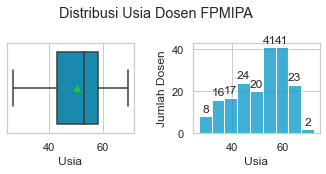

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(5.5, 2.25))
# fig.tight_layout()
fig.tight_layout(pad=2)

fig.suptitle("Distribusi Usia Dosen FPMIPA", fontsize = 'large', fontweight = 'normal', y=1.05)
    
box = sns.boxplot(data=df, x="Usia", showmeans=True, ax=axes[0])
hist = sns.histplot(data=df, x="Usia", binwidth=5, ax=axes[1])

box.set(xlabel='Usia')
hist.set(xlabel='Usia', ylabel='Jumlah Dosen')

for container in hist.containers:
    hist.bar_label(container, padding=2)

plt.show()

## Distribusi Usia Dosen FPMIPA Berdasarkan Gender dan Pendidikan Terakhir

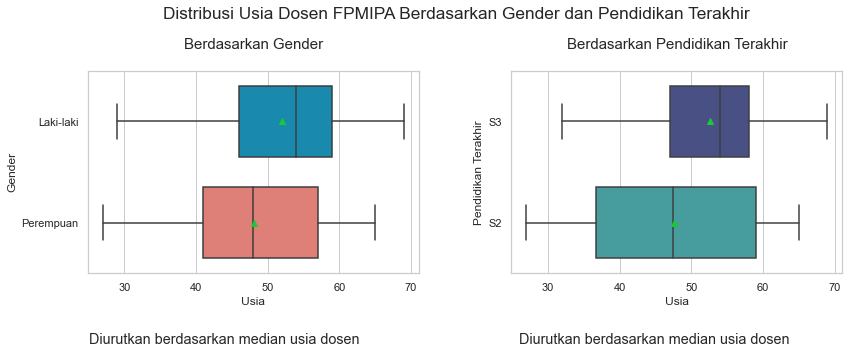

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12.6, 4.8))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle("Distribusi Usia Dosen FPMIPA Berdasarkan Gender dan Pendidikan Terakhir"
             , fontsize = 'x-large', fontweight = 'normal', y=1)

gender = df.groupby('Jenis Kelamin')["Usia"].median().reset_index()
gender = gender.sort_values(by="Usia", ascending=False)

pend_akhir = df.groupby('Pendidikan Terakhir')["Usia"].median().reset_index()
pend_akhir = pend_akhir.sort_values(by="Usia", ascending=False)

gender = sns.boxplot(x ='Usia', y = 'Jenis Kelamin', data = df, order=gender['Jenis Kelamin'], palette=custom_palette1, width=0.70, showmeans=True, ax=axes[0])
pend_akhir = sns.boxplot(x ='Usia', y = 'Pendidikan Terakhir', data = df, order=pend_akhir['Pendidikan Terakhir'], palette='mako', width=0.70, showmeans=True, ax=axes[1])


gender.set_title('Berdasarkan Gender',fontweight="normal", size=15, y=1.08)
gender.set_xlabel('Usia', fontsize = 12)
gender.set_ylabel('Gender')


pend_akhir.set_title('Berdasarkan Pendidikan Terakhir',fontweight="normal", size=15, y=1.08)
pend_akhir.set_xlabel('Usia', fontsize = 12)
pend_akhir.set_ylabel('Pendidikan Terakhir')

# gender.text(25, 2.2,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")
gender.text(25, 2.2,'Diurutkan berdasarkan median usia dosen', fontstyle="normal", fontsize="large")
# pend_akhir.text(26, 2.2,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")
pend_akhir.text(26, 2.2,'Diurutkan berdasarkan median usia dosen', fontstyle="normal", fontsize="large")

plt.show()

## Distribusi Usia Dosen FPMIPA Berdasarkan Jabatan Fungsional

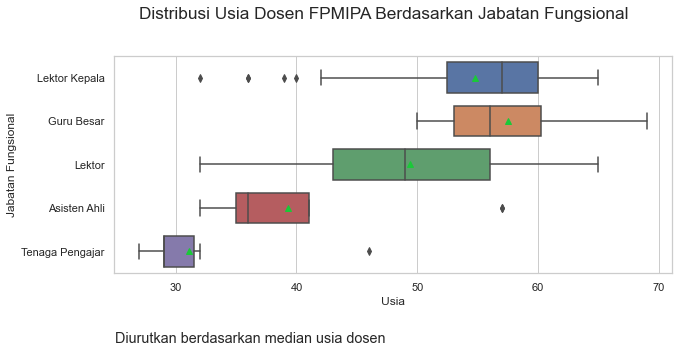

In [18]:
plt.figure(figsize=(10, 4))

jab_fung = df.groupby('Jabatan Fungsional')["Usia"].median().reset_index()
jab_fung = jab_fung.sort_values(by="Usia", ascending=False)

# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='Usia', y = 'Jabatan Fungsional', data = df, palette="deep", order=jab_fung['Jabatan Fungsional'], width=0.70, showmeans=True)

g.set(xlabel='Usia', ylabel='Jabatan Fungsional')
g.text(25, 6.1,'Diurutkan berdasarkan median usia dosen', fontstyle="normal", fontsize="large")
# g.text(25, 6.5,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi Usia Dosen FPMIPA Berdasarkan Jabatan Fungsional" , y=1.05, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi Usia Dosen FPMIPA Berdasarkan Golongan

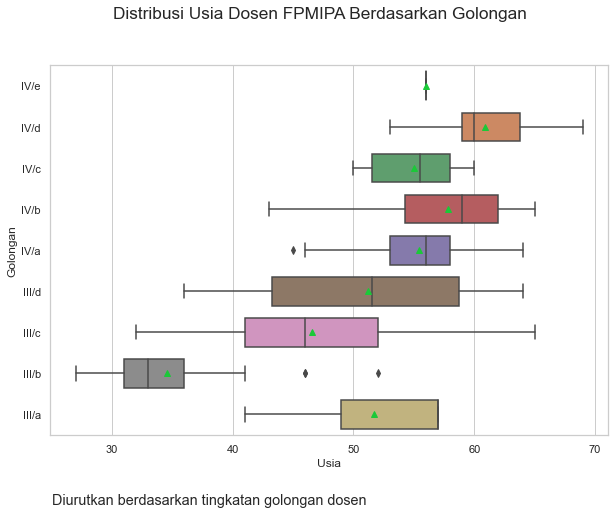

In [19]:
plt.figure(figsize=(10, 6.8))

gol = df.groupby('Gol')["Usia"].mean().reset_index()
gol = gol.sort_values(by="Gol", ascending=False)

# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='Usia', y = 'Gol', data = df, order=gol['Gol'], palette="deep", width=0.70, showmeans=True)

g.set(xlabel='Usia', ylabel='Golongan')
g.text(25, 10.2,'Diurutkan berdasarkan tingkatan golongan dosen', fontstyle="normal", fontsize="large")
# g.text(25, 10.6,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi Usia Dosen FPMIPA Berdasarkan Golongan" , y=1, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Perbandingan Distribusi Usia Dosen Berdasarkan Gender dan Pendidikan Terakhir, Setiap Program Studi FPMIPA

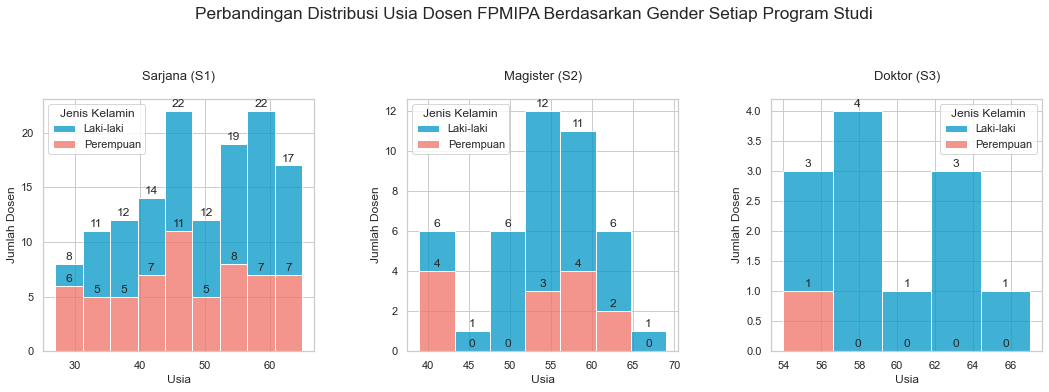

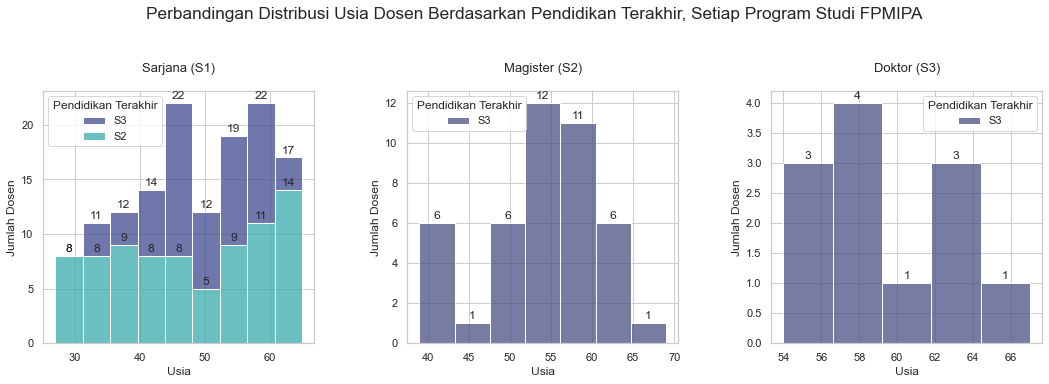

In [20]:
df_s1 = df[df["Nama Prodi"].str.contains("S1") == True]
df_s2 = df[df["Nama Prodi"].str.contains("S2") == True]
df_s3 = df[df["Nama Prodi"].str.contains("S3") == True]

fig, axes = plt.subplots(1, 3, figsize=(16, 5.5))
fig.tight_layout()
fig.tight_layout(pad=5)


fig.suptitle("Perbandingan Distribusi Usia Dosen FPMIPA Berdasarkan Gender Setiap Program Studi"
             , fontsize = 'x-large', fontweight = 'normal', y=1.07)

s1 = sns.histplot(df_s1, x="Usia", hue="Jenis Kelamin", multiple='stack', palette=custom_palette1, ax=axes[0])
s2 = sns.histplot(df_s2, x="Usia", hue="Jenis Kelamin", multiple='stack', palette=custom_palette1, ax=axes[1])
s3 = sns.histplot(df_s3, x="Usia", hue="Jenis Kelamin", multiple='stack', palette=custom_palette1, ax=axes[2])

s1.set_title('Sarjana (S1)',fontweight="normal", size=13, y=1.05)
s1.set_xlabel('Usia', fontsize = 12)
s1.set_ylabel('Jumlah Dosen')


s2.set_title('Magister (S2)',fontweight="normal", size=13, y=1.05)
s2.set_xlabel('Usia', fontsize = 12)
s2.set_ylabel('Jumlah Dosen')

s3.set_title('Doktor (S3)',fontweight="normal", size=13, y=1.05)
s3.set_xlabel('Usia', fontsize = 12)
s3.set_ylabel('Jumlah Dosen')

fig, axes = plt.subplots(1, 3, figsize=(16, 5.5))
fig.tight_layout()
fig.tight_layout(pad=5)


fig.suptitle("Perbandingan Distribusi Usia Dosen Berdasarkan Pendidikan Terakhir, Setiap Program Studi FPMIPA"
             , fontsize = 'x-large', fontweight = 'normal', y=1.05)

s1_2 = sns.histplot(df_s1, x="Usia", hue="Pendidikan Terakhir", multiple='stack', palette="mako", ax=axes[0])
s2_2 = sns.histplot(df_s2, x="Usia", hue="Pendidikan Terakhir", multiple='stack', palette=cus_col, ax=axes[1])
s3_2 = sns.histplot(df_s3, x="Usia", hue="Pendidikan Terakhir", multiple='stack', palette=cus_col, ax=axes[2])

s1_2.set_title('Sarjana (S1)',fontweight="normal", size=13, y=1.05)
s1_2.set_xlabel('Usia', fontsize = 12)
s1_2.set_ylabel('Jumlah Dosen')


s2_2.set_title('Magister (S2)',fontweight="normal", size=13, y=1.05)
s2_2.set_xlabel('Usia', fontsize = 12)
s2_2.set_ylabel('Jumlah Dosen')

s3_2.set_title('Doktor (S3)',fontweight="normal", size=13, y=1.05)
s3_2.set_xlabel('Usia', fontsize = 12)
s3_2.set_ylabel('Jumlah Dosen')

# s1_2.text(25,-6,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

# tampilkan value 
for container in s1.containers:
    s1.bar_label(container, padding=2)
for container in s2.containers:
    s2.bar_label(container, padding=2)
for container in s3.containers:
    s3.bar_label(container, padding=2)
for container in s1_2.containers:
    s1_2.bar_label(container, padding=2)
for container in s2_2.containers:
    s2_2.bar_label(container, padding=2)
for container in s3_2.containers:
    s3_2.bar_label(container, padding=2)

plt.show()

## Perbandingan Distribusi Usia Dosen, Program Studi Sarjana FPMIPA

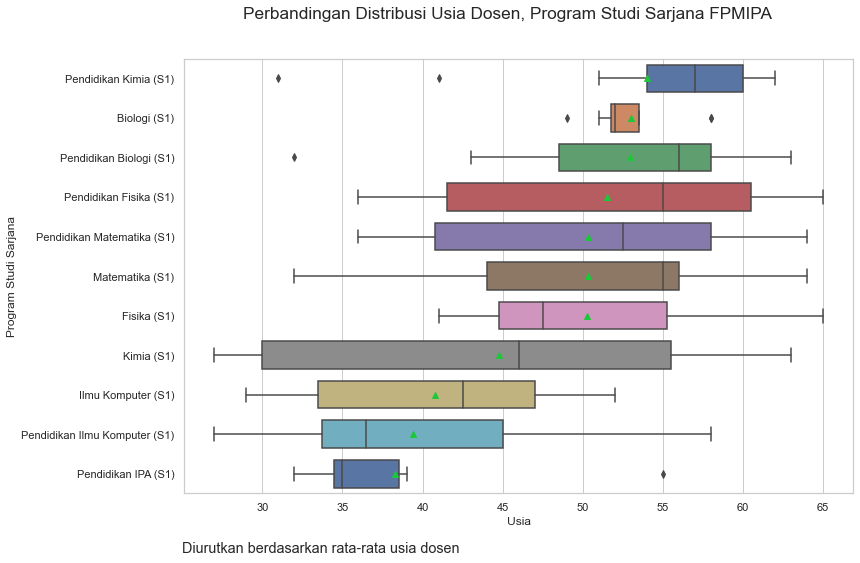

In [21]:
plt.figure(figsize=(12, 8))

# prodi = df_topten_scopus
prodis1 = df_s1.groupby('Nama Prodi')["Usia"].mean().reset_index()
prodi_s1 = prodis1.sort_values(by="Usia", ascending=False)

# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='Usia', y = 'Nama Prodi', data = df_s1, palette="deep", order = prodi_s1['Nama Prodi'], width=0.70, showmeans=True)

g.set(xlabel='Usia', ylabel='Program Studi Sarjana')
g.text(25, 12,'Diurutkan berdasarkan rata-rata usia dosen', fontstyle="normal", fontsize="large")
# g.text(25, 12.5,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Perbandingan Distribusi Usia Dosen, Program Studi Sarjana FPMIPA" , y=0.97, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Perbandingan Distribusi Usia Dosen Berdasarkan Gender, Program Studi Sarjana FPMIPA

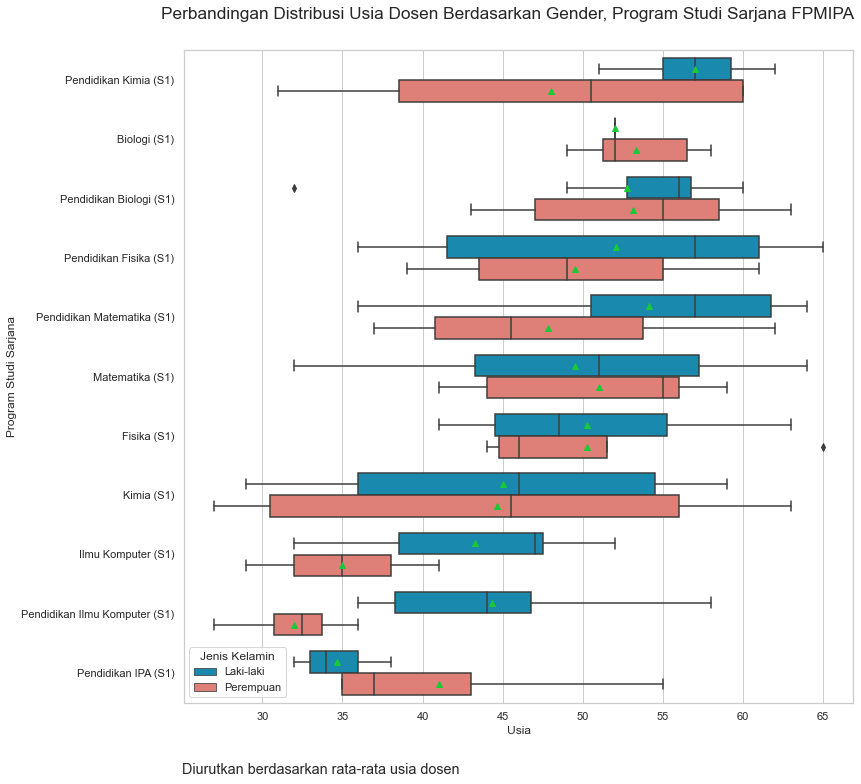

In [22]:
plt.figure(figsize=(12, 12))

# prodi = df_topten_scopus
prodis1 = df_s1.groupby('Nama Prodi')["Usia"].mean().reset_index()
prodi_s1 = prodis1.sort_values(by="Usia", ascending=False)

# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='Usia', y = 'Nama Prodi', hue='Jenis Kelamin', data = df_s1, palette=custom_palette1, order = prodi_s1['Nama Prodi'], width=0.74, showmeans=True)

g.set(xlabel='Usia', ylabel='Program Studi Sarjana')
g.text(25, 11.7,'Diurutkan berdasarkan rata-rata usia dosen', fontstyle="normal", fontsize="large")
# g.text(25, 12,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Perbandingan Distribusi Usia Dosen Berdasarkan Gender, Program Studi Sarjana FPMIPA" , y=0.93, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Perbandingan Distribusi Usia Dosen Berdasarkan Pendidikan Terakhir, Program Studi Sarjana FPMIPA

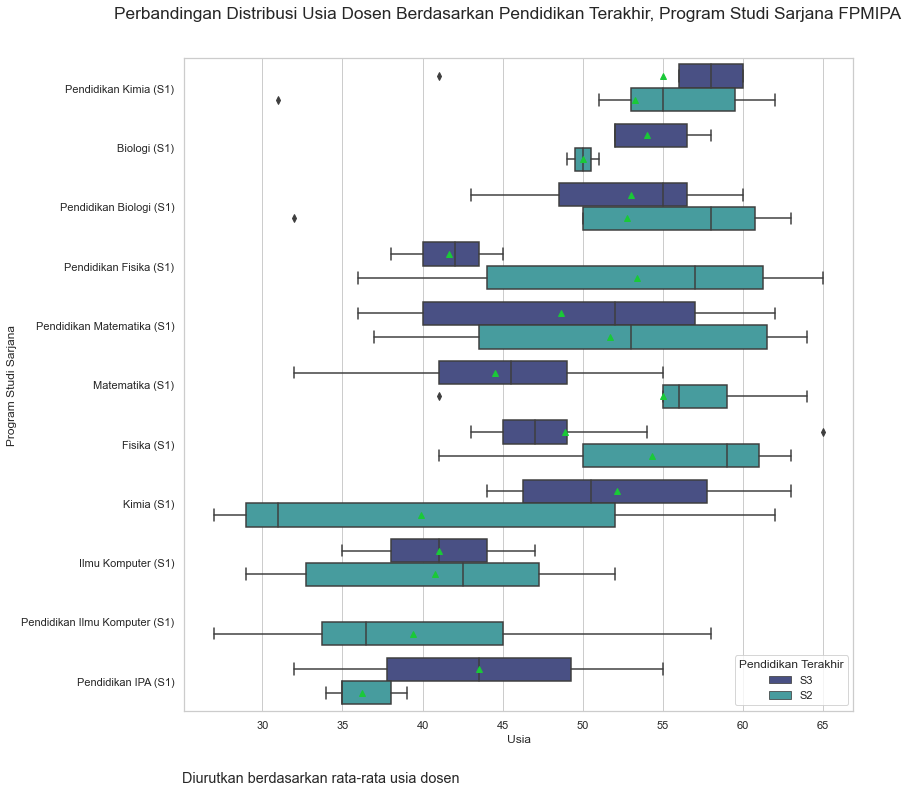

In [23]:
plt.figure(figsize=(12, 12))

# prodi = df_topten_scopus
prodis1 = df_s1.groupby('Nama Prodi')["Usia"].mean().reset_index()
prodi_s1 = prodis1.sort_values(by="Usia", ascending=False)

# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='Usia', y = 'Nama Prodi', hue='Pendidikan Terakhir', data = df_s1, palette="mako", order = prodi_s1['Nama Prodi'], width=0.8, showmeans=True)

g.set(xlabel='Usia', ylabel='Program Studi Sarjana')
g.text(25, 11.7,'Diurutkan berdasarkan rata-rata usia dosen', fontstyle="normal", fontsize="large")
# g.text(25, 12,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Perbandingan Distribusi Usia Dosen Berdasarkan Pendidikan Terakhir, Program Studi Sarjana FPMIPA" , y=0.94, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Perbandingan Distribusi Usia Dosen, Program Studi Pascasarjana FPMIPA

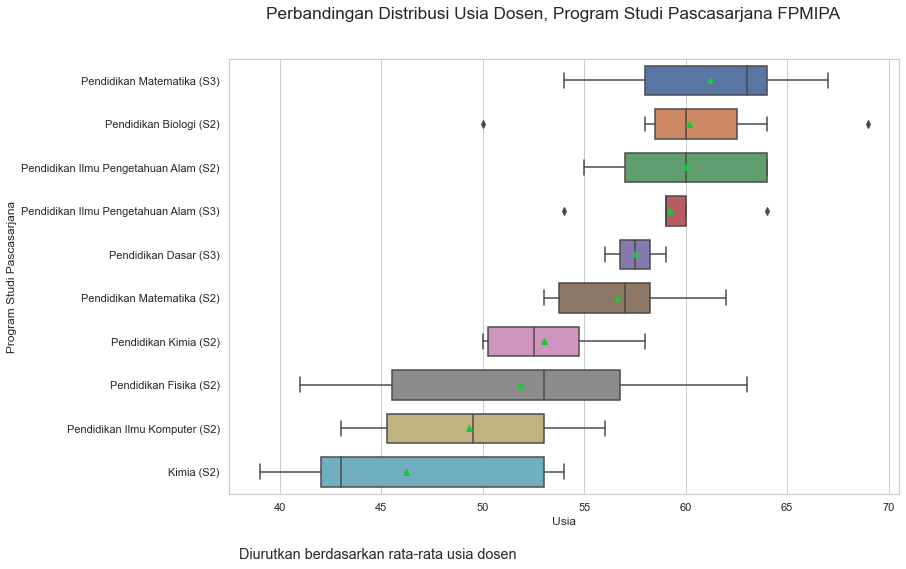

In [24]:
plt.figure(figsize=(12, 8))
# df_concat2.head(400)

# # prodi = df_topten_scopus
prodis2 = df_concat1.groupby('Nama Prodi')["Usia"].mean().reset_index()
prodi_s2 = prodis2.sort_values(by="Usia", ascending=False)

# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='Usia', y = 'Nama Prodi', data = df_concat1, palette="deep", order = prodi_s2['Nama Prodi'], width=0.68, showmeans=True)

g.set(xlabel='Usia', ylabel='Program Studi Pascasarjana')
g.text(38, 11,'Diurutkan berdasarkan rata-rata usia dosen', fontstyle="normal", fontsize="large")
# g.text(38, 11.4,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Perbandingan Distribusi Usia Dosen, Program Studi Pascasarjana FPMIPA" , y=0.97, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Perbandingan Distribusi Usia Dosen Berdasarkan Gender, Program Pascasarjana FPMIPA

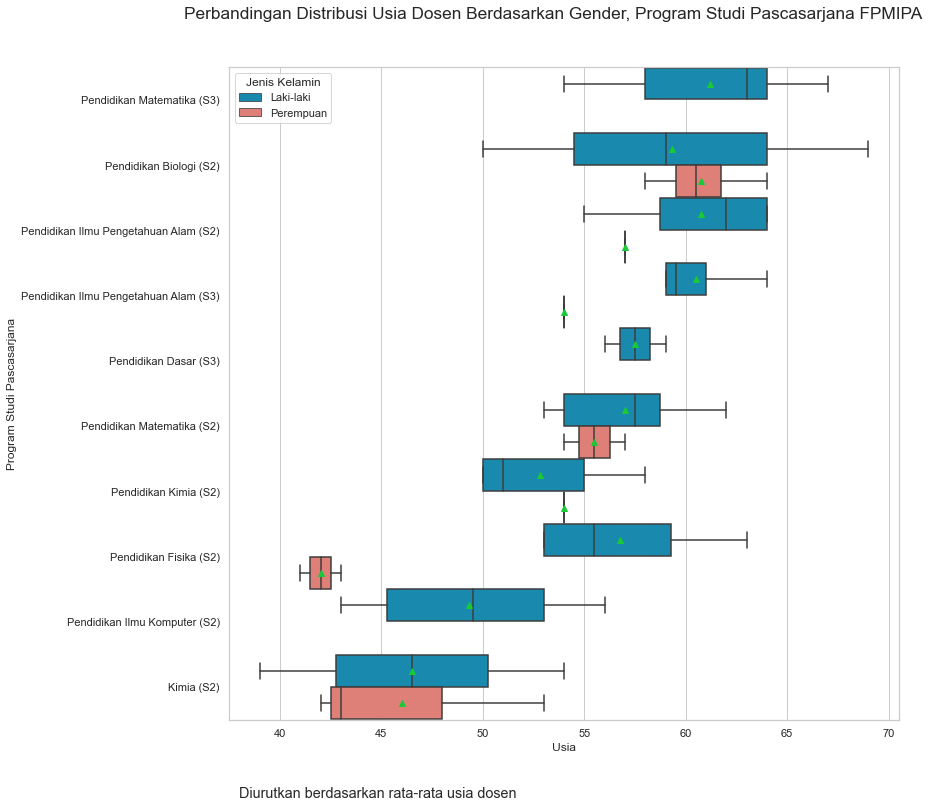

In [25]:
plt.figure(figsize=(12, 12))

# df_profesi = df[df["Nama Prodi"].str.contains("Profesi") == True]

df_concat1 = pd.concat([df_s2, df_s3], ignore_index=True)
# df_concat1 = pd.concat([df_concat1, df_profesi], ignore_index=True)
# df_concat2.head(400)

# # prodi = df_topten_scopus
prodis2 = df_concat1.groupby('Nama Prodi')["Usia"].mean().reset_index()
prodi_s2 = prodis2.sort_values(by="Usia", ascending=False)

# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='Usia', y = 'Nama Prodi', hue='Jenis Kelamin', data = df_concat1, palette=custom_palette1, order = prodi_s2['Nama Prodi'], width=1, showmeans=True)

g.set(xlabel='Usia', ylabel='Program Studi Pascasarjana')
g.text(38, 10.7,'Diurutkan berdasarkan rata-rata usia dosen', fontstyle="normal", fontsize="large")
# g.text(38, 11.1,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Perbandingan Distribusi Usia Dosen Berdasarkan Gender, Program Studi Pascasarjana FPMIPA" , y=0.95, fontsize = 'x-large', fontweight = 'regular')
plt.show()

# Dosen Muda FPMIPA Teratas

## Dua Dosen Muda FPMIPA Teratas Berdasarkan Scopus H-Index

In [26]:
dosen_muda = df[df["Usia"] <= 30]

top_scopus_hindex_muda = dosen_muda.sort_values(by="scopus_h_index", ascending=False).head(2)
top_gs_hindex_muda = dosen_muda.sort_values(by="gs_h_index", ascending=False).head(5)
top_scopus_article_muda = dosen_muda.sort_values(by="scopus_article", ascending=False).head(3)
top_gs_article_muda = dosen_muda.sort_values(by="gs_article", ascending=False).head(5)

Image(filename='1.jpg') 

FileNotFoundError: [Errno 2] No such file or directory: '1.jpg'

## Lima Dosen Muda FPMIPA Teratas Berdasarkan Google Scholar H-Index

In [ ]:
Image(filename='2.jpg') 

## Tiga Dosen Muda FPMIPA Teratas Berdasarkan Jumlah Artikel Scopus

In [ ]:
Image(filename='3.jpg') 

## Lima Dosen Muda FPMIPA Teratas Berdasarkan Jumlah Artikel Google Scholar

In [ ]:
Image(filename='4.jpg') 

## Dosen Muda FPMIPA Teratas Berdasarkan Scopus H-Index, Google Scholar H-Index, Jumlah Artikel Scopus dan Google Scholar

In [ ]:
dosen_muda = df[df["Usia"] <= 30]

top_scopus_hindex_muda = dosen_muda.sort_values(by="scopus_h_index", ascending=False).head(2)
top_gs_hindex_muda = dosen_muda.sort_values(by="gs_h_index", ascending=False).head(5)
top_scopus_article_muda = dosen_muda.sort_values(by="scopus_article", ascending=False).head(3)
top_gs_article_muda = dosen_muda.sort_values(by="gs_article", ascending=False).head(5)


# plt.figure(figsize=(5, 5))

fig, axes = plt.subplots(4, 1, figsize=(12, 15.5), gridspec_kw={'height_ratios': [2, 5, 3, 5]})
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle("Dosen Muda FPMIPA Teratas"
             , fontsize = 'x-large', fontweight = 'bold', y=1)

scopus_hindex = sns.barplot(x='scopus_h_index', y='nama', data = top_scopus_hindex_muda, palette="deep", ax=axes[0])
# fig.figure(figsize=(10, 2))

gs_hindex = sns.barplot(x='gs_h_index', y='nama', data = top_gs_hindex_muda, palette="deep", ax=axes[1])
scopus_article = sns.barplot(x='scopus_article', y='nama', data = top_scopus_article_muda, palette="deep", ax=axes[2])
gs_article = sns.barplot(x='gs_article', y='nama', data = top_gs_article_muda, palette="deep", ax=axes[3])

scopus_hindex.set_title('Dua Dosen Muda FPMIPA Teratas Berdasarkan Scopus H-Index',fontweight="bold", size=13, y=1.1)
scopus_hindex.set_xlabel('Scopus H-Index', fontsize = 12)
scopus_hindex.set_ylabel('')


gs_hindex.set_title('Lima Dosen Muda FPMIPA Teratas Berdasarkan Google Scholar-Index',fontweight="bold", size=13, y=1.04)
gs_hindex.set_xlabel('Google Scholar H-Index', fontsize = 12)
gs_hindex.set_ylabel('')


scopus_article.set_title('Tiga Dosen Muda FPMIPA Teratas Berdasarkan Jumlah Artikel Scopus',fontweight="bold", size=13, y=1.04)
scopus_article.set_xlabel('Jumlah Artikel Scopus', fontsize = 12)
scopus_article.set_ylabel('')

gs_article.set_title('Lima Dosen Muda FPMIPA Teratas Berdasarkan Jumlah Artikel Google Scholar',fontweight="bold", size=13, y=1.04)
gs_article.set_xlabel('Jumlah Artikel Google Scholar', fontsize = 12)
gs_article.set_ylabel('')

gs_article.text(0.1, 6.1,'Dosen Muda : dosen yang saat ini berusia kurang dari atau sama dengan 30 tahun', fontstyle="normal", fontsize="large")
# gs_article.text(0.1, 6.5,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

for container in scopus_hindex.containers:
    scopus_hindex.bar_label(container, padding=4)
for container in gs_hindex.containers:
    gs_hindex.bar_label(container, padding=4)
for container in scopus_article.containers:
    scopus_article.bar_label(container, padding=4)
for container in gs_article.containers:
    gs_article.bar_label(container, padding=4)

plt.show()

# Dosen FPMIPA Teratas

## Lima Dosen FPMIPA Teratas Berdasarkan Scopus H-Index

In [ ]:
top_scopus_hindex = df.sort_values(by="scopus_h_index", ascending=False).head(5)
top_gs_hindex = df.sort_values(by="gs_h_index", ascending=False).head(5)
top_scopus_article = df.sort_values(by="scopus_article", ascending=False).head(5)
top_gs_article = df.sort_values(by="gs_article", ascending=False).head(5)

Image(filename='5.jpg') 

## Lima Dosen FPMIPA Teratas Berdasarkan Google Scholar H-Index

In [ ]:
Image(filename='6.jpg') 

## Lima Dosen FPMIPA Teratas Berdasarkan Jumlah Artikel Scopus

In [ ]:
Image(filename='7.jpg') 

## Lima Dosen FPMIPA Teratas Berdasarkan Jumlah Artikel Google Scholar

In [ ]:
Image(filename='8.jpg') 

## Lima Dosen FPMIPA Teratas Berdasarkan Scopus H-Index, Google Scholar H-Index, Jumlah Artikel Scopus dan Google Scholar

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 14))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle("Dosen FPMIPA Teratas"
             , fontsize = 'x-large', fontweight = 'bold', y=1)

scopus_hindex = sns.barplot(x='scopus_h_index', y='nama', data = top_scopus_hindex, palette="deep", ax=axes[0])
gs_hindex = sns.barplot(x='gs_h_index', y='nama', data = top_gs_hindex, palette="deep", ax=axes[1])
scopus_article = sns.barplot(x='scopus_article', y='nama', data = top_scopus_article, palette="deep", ax=axes[2])
gs_article = sns.barplot(x='gs_article', y='nama', data = top_gs_article, palette="deep", ax=axes[3])


scopus_hindex.set_title('Lima Dosen FPMIPA Teratas Berdasarkan Scopus H-Index',fontweight="bold", size=13, y=1.05)
scopus_hindex.set_xlabel('Scopus H-Index', fontsize = 12)
scopus_hindex.set_ylabel('')

gs_hindex.set_title('Lima Dosen FPMIPA Teratas Berdasarkan Google Scholar H-Index',fontweight="bold", size=13, y=1.04)
gs_hindex.set_xlabel('Google Scholar H-Index', fontsize = 12)
gs_hindex.set_ylabel('')

scopus_article.set_title('Lima FPMIPA Dosen Teratas Berdasarkan Jumlah Artikel Scopus',fontweight="bold", size=13, y=1.04)
scopus_article.set_xlabel('Jumlah Artikel Scopus', fontsize = 12)
scopus_article.set_ylabel('')

gs_article.set_title('Lima FPMIPA Dosen Teratas Berdasarkan Jumlah Artikel Google Scholar',fontweight="bold", size=13, y=1.04)
gs_article.set_xlabel('Jumlah Artikel Google Scholar', fontsize = 12)
gs_article.set_ylabel('')

# gs_article.text(0,7.1,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

for container in scopus_hindex.containers:
    scopus_hindex.bar_label(container, padding=4)
for container in gs_hindex.containers:
    gs_hindex.bar_label(container, padding=4)
for container in scopus_article.containers:
    scopus_article.bar_label(container, padding=4)
for container in gs_article.containers:
    gs_article.bar_label(container, padding=4)

plt.show()

# Program Studi Sarjana FPMIPA Teratas

## Program Studi Sarjana FPMIPA Teratas Berdasarkan Median dan Mean pada Scopus H-Index dan Google Scholar H-Index Dosen

In [ ]:
fakul_hindex = df_s1

df_fakul_scopushindex_median = fakul_hindex.groupby('Nama Prodi')["scopus_h_index"].median().reset_index()
df_fakul_gshindex_median = fakul_hindex.groupby('Nama Prodi')["gs_h_index"].median().reset_index()

df_fakul_scopushindex_mean = fakul_hindex.groupby('Nama Prodi')["scopus_h_index"].mean().reset_index()
df_fakul_gshindex_mean = fakul_hindex.groupby('Nama Prodi')["gs_h_index"].mean().reset_index()


top_fakul_scopus_hindex_median = df_fakul_scopushindex_median.sort_values(by="scopus_h_index", ascending=False).head(5)
top_fakul_gs_hindex_median = df_fakul_gshindex_median.sort_values(by="gs_h_index", ascending=False).head(5)
top_fakul_scopus_hindex_mean = df_fakul_scopushindex_mean.sort_values(by="scopus_h_index", ascending=False).head(5)
top_fakul_gs_hindex_mean = df_fakul_gshindex_mean.sort_values(by="gs_h_index", ascending=False).head(5)


fig, axes = plt.subplots(4, 1, figsize=(11.5, 15))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle("Program Studi Sarjana FPMIPA Teratas"
             , fontsize = 'x-large', fontweight = 'bold', y=1)

fakul_scopus_hindex_median = sns.barplot(x='scopus_h_index', y='Nama Prodi', data = top_fakul_scopus_hindex_median, palette="deep", ax=axes[0])
fakul_gs_hindex_median = sns.barplot(x='gs_h_index', y='Nama Prodi', data = top_fakul_gs_hindex_median, palette="deep", ax=axes[1])
fakul_scopus_hindex_mean = sns.barplot(x='scopus_h_index', y='Nama Prodi', data = top_fakul_scopus_hindex_mean, palette="deep", ax=axes[2])
fakul_gs_hindex_mean = sns.barplot(x='gs_h_index', y='Nama Prodi', data = top_fakul_gs_hindex_mean, palette="deep", ax=axes[3])

fakul_scopus_hindex_median.set_title('Lima Program Studi Sarjana FPMIPA Teratas Berdasarkan Median Scopus H-Index',fontweight="bold", size=13, y=1.05)
fakul_scopus_hindex_median.set_xlabel('Median Scopus H-Index', fontsize = 12)
fakul_scopus_hindex_median.set_ylabel('')

fakul_gs_hindex_median.set_title('Lima Program Studi Sarjana FPMIPA Teratas Berdasarkan Median Google Scholar H-Index',fontweight="bold", size=13, y=1.05)
fakul_gs_hindex_median.set_xlabel('Median Google Scholar H-Index', fontsize = 12)
fakul_gs_hindex_median.set_ylabel('')

fakul_scopus_hindex_mean.set_title('Lima Program Studi Sarjana FPMIPA Teratas Berdasarkan Rata-rata Scopus H-Index',fontweight="bold", size=13, y=1.05)
fakul_scopus_hindex_mean.set_xlabel('Rata-rata Scopus H-Index', fontsize = 12)
fakul_scopus_hindex_mean.set_ylabel('')

fakul_gs_hindex_mean.set_title('Lima Program Studi Sarjana FPMIPA Teratas Berdasarkan Rata-rata Google Scholar H-Index',fontweight="bold", size=13, y=1.05)
fakul_gs_hindex_mean.set_xlabel('Rata-rata Google Scholar H-Index', fontsize = 12)
fakul_gs_hindex_mean.set_ylabel('')


# fakul_gs_hindex_mean.text(0.1,6.5,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

for container in fakul_scopus_hindex_median.containers:
    fakul_scopus_hindex_median.bar_label(container, padding=4)
for container in fakul_gs_hindex_median.containers:
    fakul_gs_hindex_median.bar_label(container, padding=4)
for container in fakul_scopus_hindex_mean.containers:
    fakul_scopus_hindex_mean.bar_label(container, padding=4, fmt='%.1f')
for container in fakul_gs_hindex_mean.containers:
    fakul_gs_hindex_mean.bar_label(container, padding=4, fmt='%.1f')

plt.show()

# Program Studi Pascasarjana FPMIPA Teratas

## Program Studi Pascasarjana FPMIPA Teratas Berdasarkan Median dan Mean pada Scopus H-Index dan Google Scholar H-Index Dosen

In [ ]:
fakul_hindex = df_concat1

df_fakul_scopushindex_median = fakul_hindex.groupby('Nama Prodi')["scopus_h_index"].median().reset_index()
df_fakul_gshindex_median = fakul_hindex.groupby('Nama Prodi')["gs_h_index"].median().reset_index()

df_fakul_scopushindex_mean = fakul_hindex.groupby('Nama Prodi')["scopus_h_index"].mean().reset_index()
df_fakul_gshindex_mean = fakul_hindex.groupby('Nama Prodi')["gs_h_index"].mean().reset_index()


top_fakul_scopus_hindex_median = df_fakul_scopushindex_median.sort_values(by="scopus_h_index", ascending=False).head(5)
top_fakul_gs_hindex_median = df_fakul_gshindex_median.sort_values(by="gs_h_index", ascending=False).head(5)
top_fakul_scopus_hindex_mean = df_fakul_scopushindex_mean.sort_values(by="scopus_h_index", ascending=False).head(5)
top_fakul_gs_hindex_mean = df_fakul_gshindex_mean.sort_values(by="gs_h_index", ascending=False).head(5)


fig, axes = plt.subplots(4, 1, figsize=(11, 15))
fig.tight_layout()
fig.tight_layout(pad=5)

fig.suptitle("Program Studi Pascasarjana FPMIPA Teratas"
             , fontsize = 'x-large', fontweight = 'bold', y=1)

fakul_scopus_hindex_median = sns.barplot(x='scopus_h_index', y='Nama Prodi', data = top_fakul_scopus_hindex_median, palette="deep", ax=axes[0])
fakul_gs_hindex_median = sns.barplot(x='gs_h_index', y='Nama Prodi', data = top_fakul_gs_hindex_median, palette="deep", ax=axes[1])
fakul_scopus_hindex_mean = sns.barplot(x='scopus_h_index', y='Nama Prodi', data = top_fakul_scopus_hindex_mean, palette="deep", ax=axes[2])
fakul_gs_hindex_mean = sns.barplot(x='gs_h_index', y='Nama Prodi', data = top_fakul_gs_hindex_mean, palette="deep", ax=axes[3])

fakul_scopus_hindex_median.set_title('Lima Program Studi Pascasarjana FPMIPA Teratas Berdasarkan Median Scopus H-Index',fontweight="bold", size=13, y=1.05)
fakul_scopus_hindex_median.set_xlabel('Median Scopus H-Index', fontsize = 12)
fakul_scopus_hindex_median.set_ylabel('')

fakul_gs_hindex_median.set_title('Lima Program Studi Pascasarjana FPMIPA Teratas Berdasarkan Median Google Scholar H-Index',fontweight="bold", size=13, y=1.05)
fakul_gs_hindex_median.set_xlabel('Median Google Scholar H-Index', fontsize = 12)
fakul_gs_hindex_median.set_ylabel('')

fakul_scopus_hindex_mean.set_title('Lima Program Studi Pascasarjana FPMIPA Teratas Berdasarkan Rata-rata Scopus H-Index',fontweight="bold", size=13, y=1.05)
fakul_scopus_hindex_mean.set_xlabel('Rata-rata Scopus H-Index', fontsize = 12)
fakul_scopus_hindex_mean.set_ylabel('')

fakul_gs_hindex_mean.set_title('Lima Program Studi Pascasarjana FPMIPA Teratas Berdasarkan Rata-rata Google Scholar H-Index',fontweight="bold", size=13, y=1.05)
fakul_gs_hindex_mean.set_xlabel('Rata-rata Google Scholar H-Index', fontsize = 12)
fakul_gs_hindex_mean.set_ylabel('')


# fakul_gs_hindex_mean.text(0.1,6.5,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

for container in fakul_scopus_hindex_median.containers:
    fakul_scopus_hindex_median.bar_label(container, padding=4)
for container in fakul_gs_hindex_median.containers:
    fakul_gs_hindex_median.bar_label(container, padding=4)
for container in fakul_scopus_hindex_mean.containers:
    fakul_scopus_hindex_mean.bar_label(container, padding=4, fmt='%.1f')
for container in fakul_gs_hindex_mean.containers:
    fakul_gs_hindex_mean.bar_label(container, padding=4)

plt.show()

# Perbandingan Distribusi H-indeks pada Scopus, Google Scholar, dan Web of Science, FPMIPA

In [ ]:
df_sort_gs = df.sort_values(by="gs_h_index", ascending=False)
df_sort_wos = df.sort_values(by="wos_h_index", ascending=False)

n = 10
m = 5
df_topten1 = df_sort_gs.head(int(len(df_sort_gs)*(n/100)))
df_topten2 = df_sort_wos.head(int(len(df_sort_wos)*(m/100)))
df_final1 = list(df_topten1.nama.values)
df_final2 = list(df_topten2.nama.values)

df_topten_gs = df[~df.nama.isin(df_final1)]
df_topten_wos = df[~df.nama.isin(df_final2)]

df_sort_scopus_hindex = df.sort_values(by="scopus_h_index", ascending=False)

n = 10
df_topten = df_sort_scopus_hindex.head(int(len(df_sort_scopus_hindex)*(n/100)))
df_final = list(df_topten.nama.values)

df_topten_scopus = df[~df.nama.isin(df_final)]
# df_topten_scopus['nama'].iat[556]

    
fig, axes = plt.subplots(1, 3, figsize=(14, 3.5))
fig.tight_layout()
fig.tight_layout(pad=3)
fig.suptitle("Perbandingan Distribusi H-Indeks pada Scopus, Google Scholar, dan Web of Science, FPMIPA" , fontsize = 'large', fontweight = 'bold', y=1.05)


scopus = sns.boxplot(x='scopus_h_index', data = df_topten_scopus, palette="deep", showmeans=True, ax=axes[0])
gs = sns.boxplot(x='gs_h_index', data = df_topten_gs, palette="deep", showmeans=True, ax=axes[1])
wos = sns.boxplot(x='wos_h_index', data = df_topten_wos, palette="deep", showmeans=True, ax=axes[2])


scopus.set_title('Distribusi Scopus H-Index',fontweight="normal", size=13)
scopus.set_xlabel('Scopus H-Index', fontsize = 12)
scopus.set_ylabel('')

gs.set_title('Distribusi Google Scholar H-Index',fontweight="normal", size=13)
gs.set_xlabel('Google Scholar H-Index', fontsize = 12)
gs.set_ylabel('')

wos.set_title('Distribusi WOS H-Index',fontweight="normal", size=13)
wos.set_xlabel('WOS H-Index', fontsize = 12)
wos.set_ylabel('')

fig, axes = plt.subplots(1, 3, figsize=(13.6, 4))
fig.tight_layout()
fig.tight_layout(pad=3)


scopus = sns.histplot(x='scopus_h_index', data = df_topten_scopus, binwidth=0.9, palette="deep", ax=axes[0])
gs = sns.histplot(x='gs_h_index', data = df_topten_gs, binwidth=2, palette="deep", ax=axes[1])
wos = sns.histplot(x='wos_h_index', data = df_topten_wos,  binwidth=0.8, palette="deep", ax=axes[2])

scopus.set_title('Distribusi Scopus H-Index',fontweight="normal", size=13)
scopus.set_xlabel('Scopus H-Index', fontsize = 12)
scopus.set_ylabel('')

gs.set_title('Distribusi Google Scholar H-Index',fontweight="normal", size=13)
gs.set_xlabel('Google Scholar H-Index', fontsize = 12)
gs.set_ylabel('')

wos.set_title('Distribusi WOS H-Index',fontweight="normal", size=13)
wos.set_xlabel('WOS H-Index', fontsize = 12)
wos.set_ylabel('')

for container in scopus.containers:
    scopus.bar_label(container, padding=2)
for container in gs.containers:
    gs.bar_label(container, padding=2)
for container in wos.containers:
    wos.bar_label(container, padding=2)

plt.show()

# Scopus H-Index

## Distribusi Scopus H-Index Dosen Setiap Program Studi FPMIPA

In [ ]:
scopus_mean = df['scopus_h_index'].mean()
scopus_q1 = df['scopus_h_index'].quantile(0.25)
scopus_median = df['scopus_h_index'].median()
scopus_q3 = df['scopus_h_index'].quantile(0.75)
scopus_min = df['scopus_h_index'].min()
scopus_max = df['scopus_h_index'].max()
scopus_std = df['scopus_h_index'].std()

scopus_mean = np.round(scopus_mean, 0).astype(int)
scopus_q1 = np.round(scopus_q1, 0).astype(int)
scopus_median = np.round(scopus_median, 0).astype(int)
scopus_q3 = np.round(scopus_q3, 0).astype(int)
scopus_min = np.round(scopus_min, 0).astype(int)
scopus_max = np.round(scopus_max, 0).astype(int)
scopus_std = np.round(scopus_std, 0).astype(int)

dist_scopus = [['Mean', scopus_mean], ['Std', scopus_std], ['Kuartil 1', scopus_q1], ['Median', scopus_median], ['Kuartil 3', scopus_q3], ['Min', scopus_min], ['Max', scopus_max]]

df_dist_scopus = pd.DataFrame(dist_scopus, columns=['Deskripsi', 'Scopus H-Index'])

df_dist_scopus.head(100)

display(Markdown(df_dist_scopus.to_markdown(index=False)))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(5.5, 2.25))
fig.tight_layout(pad=2)

fig.suptitle("Distribusi Scopus H-Index Dosen FPMIPA", fontsize = 'large', fontweight = 'normal', y=1.05)
    
box = sns.boxplot(data=df_topten_scopus, x="scopus_h_index", showmeans=True, ax=axes[0])
hist = sns.histplot(data=df_topten_scopus, x="scopus_h_index", binwidth=0.9, ax=axes[1])

box.set(xlabel='Scopus H-Index')
hist.set(xlabel='Scopus H-Index', ylabel='Jumlah Dosen')

for container in hist.containers:
    hist.bar_label(container, padding=2)

plt.show()

## Distribusi Scopus H-Index Dosen, Program Studi Sarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 8))

df_s1_scopus = df_topten_scopus
df_s1_scopus = df_s1_scopus[df_s1_scopus["Nama Prodi"].str.contains("S1") == True]

prodi_s1 = df_s1_scopus
df_prodi_scopus_s1 = prodi_s1.groupby('Nama Prodi')["scopus_h_index"].median().reset_index()
prodi_scopus_s1 = df_prodi_scopus_s1.sort_values(by="scopus_h_index", ascending=False)


# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', kemudian diurutkan
g = sns.boxplot(x ='scopus_h_index', y = 'Nama Prodi', data = df_s1_scopus, order = prodi_scopus_s1['Nama Prodi'], palette="deep", width=0.7, showmeans=True)

g.set(xlabel='Scopus H-Index', ylabel='Program Studi Sarjana')
g.text(0, 12.2,'Diurutkan berdasarkan median Scopus H-Index dosen', fontstyle="normal", fontsize="large")
# g.text(0, 12.6,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi Scopus H-Index Dosen, Program Studi Sarjana FPMIPA", y=0.95, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi Scopus H-Index Dosen, Program Studi Pascasarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 7))

df_s2_scopus = df_topten_scopus
df_s3_scopus = df_topten_scopus

df_s2_scopus = df_s2_scopus[df_s2_scopus["Nama Prodi"].str.contains("S2") == True]
df_s3_scopus = df_s3_scopus[df_s3_scopus["Nama Prodi"].str.contains("S3") == True]


df_concat_scopus = pd.concat([df_s2_scopus, df_s3_scopus], ignore_index=True)

prodi_s23 = df_concat_scopus
df_prodi_scopus_s23 = prodi_s23.groupby('Nama Prodi')["scopus_h_index"].median().reset_index()
prodi_scopus_s23 = df_prodi_scopus_s23.sort_values(by="scopus_h_index", ascending=False)


# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', kemudian diurutkan
g = sns.boxplot(x ='scopus_h_index', y = 'Nama Prodi', data = df_concat_scopus, order = prodi_scopus_s23['Nama Prodi'], palette="deep", width=0.7, showmeans=True)

g.set(xlabel='Scopus H-Index', ylabel='Program Studi Pascasarjana')
g.text(0, 11.2,'Diurutkan berdasarkan median Scopus H-Index dosen', fontstyle="normal", fontsize="large")
# g.text(0, 11.6,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi Scopus H-Index Dosen, Program Studi Pascasarjana FPMIPA", y=0.95, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi Scopus H-Index Dosen Berdasarkan Gender, Program Studi Sarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 14))

# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='scopus_h_index', y = 'Nama Prodi', hue='Jenis Kelamin', data = df_s1_scopus, order = prodi_scopus_s1['Nama Prodi'], palette=custom_palette1, width=0.70, showmeans=True)

g.set(xlabel='Scopus H-Index', ylabel='Program Studi Sarjana')
g.text(0, 11.6,'Diurutkan berdasarkan median Scopus H-Index dosen', fontstyle="normal", fontsize="large")
# g.text(0, 11.9,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi Scopus H-Index Dosen Berdasarkan Gender, Program Studi Sarjana FPMIPA" , y=0.93, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi Scopus H-Index Dosen Berdasarkan Gender, Program Studi Pascasarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 13.5))

# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='scopus_h_index', y = 'Nama Prodi', hue='Jenis Kelamin', data = df_concat_scopus, order = prodi_scopus_s23['Nama Prodi'], palette=custom_palette1, width=0.75, showmeans=True)

g.set(xlabel='Scopus H-Index', ylabel='Program Studi Pascasarjana')
g.text(0, 10.6,'Diurutkan berdasarkan median Scopus H-Index dosen', fontstyle="normal", fontsize="large")
# g.text(0, 10.9,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi Scopus H-Index Dosen Berdasarkan Gender, Program Studi Pascasarjana FPMIPA" , y=0.93, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi Scopus H-Index Dosen Berdasarkan Pendidikan Terakhir, Program Studi Sarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 14))

# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='scopus_h_index', y = 'Nama Prodi', hue='Pendidikan Terakhir', data = df_s1_scopus, order = prodi_scopus_s1['Nama Prodi'], palette="mako", width=0.8, showmeans=True)

g.set(xlabel='Scopus H-Index', ylabel='Program Studi Sarjana')
g.text(0, 11.7,'Diurutkan berdasarkan median Scopus H-Index dosen', fontstyle="normal", fontsize="large")
# g.text(0, 12,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi Scopus H-Index Dosen Berdasarkan Pendidikan Terakhir, Program Studi Sarjana FPMIPA" , y=0.93, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi Scopus H-Index Dosen Berdasarkan Pendidikan Terakhir, Program Studi Pascasarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 7.8))

# deklarasi boxplot dengan x sebagai kolom 'scopus_h_index' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='scopus_h_index', y = 'Nama Prodi', hue='Pendidikan Terakhir', data = df_concat_scopus, order = prodi_scopus_s23['Nama Prodi'], palette=cus_col, width=0.70, showmeans=True)

g.set(xlabel='Scopus H-Index', ylabel='Program Studi Pascasarjana')
g.text(0, 11,'Diurutkan berdasarkan median Scopus H-Index dosen', fontstyle="normal", fontsize="large")
# g.text(0, 11.3,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi Scopus H-Index Dosen Berdasarkan Pendidikan Terakhir, Program Studi Pascasarjana FPMIPA" , y=0.97, fontsize = 'x-large', fontweight = 'regular')
plt.show()

# SINTA 3yr Score

## Distribusi SINTA 3yr Score Dosen Setiap Program Studi FPMIPA

In [ ]:
sinta3yr_mean = df['sinta_3yr_score'].mean()
sinta3yr_q1 = df['sinta_3yr_score'].quantile(0.25)
sinta3yr_median = df['sinta_3yr_score'].median()
sinta3yr_q3 = df['sinta_3yr_score'].quantile(0.75)
sinta3yr_min = df['sinta_3yr_score'].min()
sinta3yr_max = df['sinta_3yr_score'].max()
sinta3yr_std = df['sinta_3yr_score'].std()

sinta3yr_mean = np.round(sinta3yr_mean, 0).astype(int)
sinta3yr_q1 = np.round(sinta3yr_q1, 0).astype(int)
sinta3yr_median = np.round(sinta3yr_median, 0).astype(int)
sinta3yr_q3 = np.round(sinta3yr_q3, 0).astype(int)
sinta3yr_min = np.round(sinta3yr_min, 0).astype(int)
sinta3yr_max = np.round(sinta3yr_max, 0).astype(int)
sinta3yr_std = np.round(sinta3yr_std, 0).astype(int)

dist_sinta3yr = [['Mean', sinta3yr_mean], ['Std', sinta3yr_std], ['Kuartil 1', sinta3yr_q1], ['Median', sinta3yr_median], ['Kuartil 3', sinta3yr_q3], ['Min', sinta3yr_min], ['Max', sinta3yr_max]]
  
df_dist_sinta3yr = pd.DataFrame(dist_sinta3yr, columns=['Deskripsi', 'SINTA 3yr Score'])

df_dist_sinta3yr.head(100)

display(Markdown(df_dist_sinta3yr.to_markdown(index=False)))

In [ ]:
df_sort_sinta3yr = df.sort_values(by="sinta_3yr_score", ascending=False)

n = 10
df_topten = df_sort_sinta3yr.head(int(len(df_sort_sinta3yr)*(n/100)))
df_final = list(df_topten.nama.values)

# print(df_final)

df_topten_sinta3yr = df[~df.nama.isin(df_final)]

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(5.5, 2.25))
fig.tight_layout(pad=2)

fig.suptitle("Distribusi SINTA 3yr Score Dosen FPMIPA", fontsize = 'large', fontweight = 'normal', y=1.05)
    
box = sns.boxplot(data=df_topten_sinta3yr, x="sinta_3yr_score", showmeans=True, ax=axes[0])
hist = sns.histplot(data=df_topten_sinta3yr, x="sinta_3yr_score", binwidth=100, ax=axes[1])

box.set(xlabel='SINTA 3yr Score')
hist.set(xlabel='SINTA 3yr Score', ylabel='Jumlah Dosen')

for container in hist.containers:
    hist.bar_label(container, padding=2)

plt.show()

## Distribusi SINTA 3yr Score Dosen, Program Studi Sarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 8))

df_s1_sinta3yr = df_topten_sinta3yr
df_s1_sinta3yr = df_s1_sinta3yr[df_s1_sinta3yr["Nama Prodi"].str.contains("S1") == True]

prodi_s1 = df_s1_sinta3yr
df_prodi_sinta3yr_s1 = prodi_s1.groupby('Nama Prodi')["sinta_3yr_score"].median().reset_index()
top_prodi_sinta3yr_s1 = df_prodi_sinta3yr_s1.sort_values(by="sinta_3yr_score", ascending=False)

# deklarasi boxplot dengan x sebagai kolom 'sinta_3yr_score' dan y sebagai kolom 'Fakultas', kemudian diurutkan
g = sns.boxplot(x ='sinta_3yr_score', y = 'Nama Prodi', data = df_s1_sinta3yr, order = top_prodi_sinta3yr_s1['Nama Prodi'], palette="deep", width=0.7, showmeans=True)

g.set(xlabel='SINTA 3yr Score', ylabel='Program Studi Sarjana')
g.text(0, 12.2,'Diurutkan berdasarkan median SINTA 3yr Score dosen', fontstyle="normal", fontsize="large")
# g.text(0, 12.7,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi SINTA 3yr Score Dosen, Program Studi Sarjana FPMIPA", y=0.95, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi SINTA 3yr Score Dosen, Program Studi Pascasarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 6.8))

df_s2_sinta3yr = df_topten_sinta3yr
df_s3_sinta3yr = df_topten_sinta3yr

df_s2_sinta3yr = df_s2_sinta3yr[df_s2_sinta3yr["Nama Prodi"].str.contains("S2") == True]
df_s3_sinta3yr = df_s3_sinta3yr[df_s3_sinta3yr["Nama Prodi"].str.contains("S3") == True]

df_concat_sinta3yr = pd.concat([df_s2_sinta3yr, df_s3_sinta3yr], ignore_index=True)

prodi_s23 = df_concat_sinta3yr
df_prodi_sinta3yr_s23 = prodi_s23.groupby('Nama Prodi')["sinta_3yr_score"].median().reset_index()
top_prodi_sinta3yr_s23 = df_prodi_sinta3yr_s23.sort_values(by="sinta_3yr_score", ascending=False)

# deklarasi boxplot dengan x sebagai kolom 'sinta_3yr_score' dan y sebagai kolom 'Fakultas', kemudian diurutkan
g = sns.boxplot(x ='sinta_3yr_score', y = 'Nama Prodi', data = df_concat_sinta3yr, order = top_prodi_sinta3yr_s23['Nama Prodi'], palette="deep", width=0.7, showmeans=True)

g.set(xlabel='SINTA 3yr Score', ylabel='Program Studi Pascasarjana')
g.text(0, 10.2,'Diurutkan berdasarkan median SINTA 3yr Score dosen', fontstyle="normal", fontsize="large")
# g.text(0, 10.7,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi SINTA 3yr Score Dosen, Program Studi Pascasarjana FPMIPA", y=0.95, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi SINTA 3yr Score Dosen Berdasarkan Gender, Program Studi Sarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 14))

# deklarasi boxplot dengan x sebagai kolom 'sinta_3yr_score' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='sinta_3yr_score', y = 'Nama Prodi', hue='Jenis Kelamin', data = df_s1_sinta3yr, order = top_prodi_sinta3yr_s1['Nama Prodi'], palette=custom_palette1, width=0.8, showmeans=True)

g.set(xlabel='SINTA 3yr Score', ylabel='Program Studi Sarjana')
g.text(0, 11.4,'Diurutkan berdasarkan median SINTA 3yr Score dosen', fontstyle="normal", fontsize="large")
# g.text(0, 11.6,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi SINTA 3yr Score Dosen Berdasarkan Gender, Program Studi Sarjana FPMIPA", y=0.92, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi SINTA 3yr Score Dosen Berdasarkan Gender, Program Studi Pascasarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 12.2))

# deklarasi boxplot dengan x sebagai kolom 'sinta_3yr_score' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='sinta_3yr_score', y = 'Nama Prodi', hue='Jenis Kelamin', data = df_concat_sinta3yr, order = top_prodi_sinta3yr_s23['Nama Prodi'], palette=custom_palette1, width=0.8, showmeans=True)

g.set(xlabel='SINTA 3yr Score', ylabel='Program Studi Pascasarjana')
g.text(0, 9.4,'Diurutkan berdasarkan median SINTA 3yr Score dosen', fontstyle="normal", fontsize="large")
# g.text(0, 9.6,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi SINTA 3yr Score Dosen Berdasarkan Gender, Program Studi Pascasarjana FPMIPA", y=0.92, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi SINTA 3yr Score Dosen Berdasarkan Pendidikan Terakhir, Program Studi Sarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 14))

# deklarasi boxplot dengan x sebagai kolom 'sinta_3yr_score' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='sinta_3yr_score', y = 'Nama Prodi', hue='Pendidikan Terakhir', data = df_s1_sinta3yr, order = top_prodi_sinta3yr_s1['Nama Prodi'], palette="mako", width=0.8, showmeans=True)

g.set(xlabel='SINTA 3yr Score', ylabel='Program Studi Sarjana')
g.text(0, 11.4,'Diurutkan berdasarkan median SINTA 3yr Score dosen', fontstyle="normal", fontsize="large")
# g.text(0, 11.6,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi SINTA 3yr Score Dosen Berdasarkan Pendidikan Terakhir, Program Studi Sarjana FPMIPA", y=0.92, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi SINTA 3yr Score Dosen Berdasarkan Pendidikan Terakhir, Program Studi Pascasarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 7.8))

# deklarasi boxplot dengan x sebagai kolom 'sinta_3yr_score' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='sinta_3yr_score', y = 'Nama Prodi', hue='Pendidikan Terakhir', data = df_concat_sinta3yr, order = top_prodi_sinta3yr_s23['Nama Prodi'], palette=cus_col, width=0.67, showmeans=True)

g.set(xlabel='SINTA 3yr Score', ylabel='Program Studi Pascasarjana')
g.text(0, 10,'Diurutkan berdasarkan median SINTA 3yr Score dosen', fontstyle="normal", fontsize="large")
# g.text(0, 10.3,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi SINTA 3yr Score Dosen Berdasarkan Pendidikan Terakhir, Program Studi Pascasarjana FPMIPA", y=0.96, fontsize = 'x-large', fontweight = 'regular')
plt.show()

# SINTA Score

## Distribusi SINTA Score Dosen Setiap Program Studi FPMIPA

In [ ]:
sinta_mean = df['sinta_score'].mean()
sinta_q1 = df['sinta_score'].quantile(0.25)
sinta_median = df['sinta_score'].median()
sinta_q3 = df['sinta_score'].quantile(0.75)
sinta_min = df['sinta_score'].min()
sinta_max = df['sinta_score'].max()
sinta_std = df['sinta_score'].std()

sinta_mean = np.round(sinta_mean, 0).astype(int)
sinta_q1 = np.round(sinta_q1, 0).astype(int)
sinta_median = np.round(sinta_median, 0).astype(int)
sinta_q3 = np.round(sinta_q3, 0).astype(int)
sinta_min = np.round(sinta_min, 0).astype(int)
sinta_max = np.round(sinta_max, 0).astype(int)
sinta_std = np.round(sinta_std, 0).astype(int)

dist_sinta = [['Mean', sinta_mean], ['Std', sinta_std], ['Kuartil 1', sinta_q1], ['Median', sinta_median], ['Kuartil 3', sinta_q3], ['Min', sinta_min], ['Max', sinta_max]]
  
df_dist_sinta = pd.DataFrame(dist_sinta, columns=['Deskripsi', 'SINTA Score'])

df_dist_sinta.head(100)

display(Markdown(df_dist_sinta.to_markdown(index=False)))

In [ ]:
df_sort_sinta = df.sort_values(by="sinta_score", ascending=False)

n = 10
df_topten = df_sort_sinta.head(int(len(df_sort_sinta)*(n/100)))
df_final = list(df_topten.nama.values)

df_topten_sinta = df[~df.nama.isin(df_final)]

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(5.5, 2.25))
fig.tight_layout(pad=2)

fig.suptitle("Distribusi SINTA Score Dosen FPMIPA", fontsize = 'large', fontweight = 'normal', y=1.05)
    
box = sns.boxplot(data=df_topten_sinta, x="sinta_score", showmeans=True, ax=axes[0])
hist = sns.histplot(data=df_topten_sinta, x="sinta_score", binwidth=225, ax=axes[1])

box.set(xlabel='SINTA Score')
hist.set(xlabel='SINTA Score', ylabel='Jumlah Dosen')

for container in hist.containers:
    hist.bar_label(container, padding=2)

plt.show()

## Distribusi SINTA Score Dosen, Program Studi Sarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 8))

df_s1_sinta = df_topten_sinta
df_s1_sinta = df_s1_sinta[df_s1_sinta["Nama Prodi"].str.contains("S1") == True]

prodi_s1 = df_s1_sinta
df_prodi_sinta_s1 = prodi_s1.groupby('Nama Prodi')["sinta_score"].median().reset_index()
top_prodi_sinta_s1 = df_prodi_sinta_s1.sort_values(by="sinta_score", ascending=False)

# deklarasi boxplot dengan x sebagai kolom 'sinta_score' dan y sebagai kolom 'Fakultas', kemudian diurutkan
fig = sns.boxplot(x ='sinta_score', y = 'Nama Prodi', data = df_s1_sinta, order = top_prodi_sinta_s1['Nama Prodi'], palette="deep", width=0.7, showmeans=True)

fig.set(xlabel='SINTA Score', ylabel='Program Studi Sarjana')
fig.text(0, 12.2,'Diurutkan berdasarkan median SINTA Score', fontstyle="normal", fontsize="large")
# fig.text(0, 12.7,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi SINTA Score Dosen, Program Studi Sarjana FPMIPA", y=0.94, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi SINTA Score Dosen, Program Studi Pascasarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 7))

df_s2_sinta = df_topten_sinta
df_s3_sinta = df_topten_sinta

df_s2_sinta = df_s2_sinta[df_s2_sinta["Nama Prodi"].str.contains("S2") == True]
df_s3_sinta = df_s3_sinta[df_s3_sinta["Nama Prodi"].str.contains("S3") == True]

df_concat_sinta = pd.concat([df_s2_sinta, df_s3_sinta], ignore_index=True)

prodi_s23 = df_concat_sinta
df_prodi_sinta_s23 = prodi_s23.groupby('Nama Prodi')["sinta_score"].median().reset_index()
top_prodi_sinta_s23 = df_prodi_sinta_s23.sort_values(by="sinta_score", ascending=False)

# deklarasi boxplot dengan x sebagai kolom 'sinta_score' dan y sebagai kolom 'Fakultas', kemudian diurutkan
fig = sns.boxplot(x ='sinta_score', y = 'Nama Prodi', data = df_concat_sinta, order = top_prodi_sinta_s23['Nama Prodi'], palette="deep", width=0.7, showmeans=True)

fig.set(xlabel='SINTA Score', ylabel='Program Studi Pascasarjana')
fig.text(0, 10.2,'Diurutkan berdasarkan median SINTA Score dosen', fontstyle="normal", fontsize="large")
# fig.text(0, 10.7,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi SINTA Score Dosen, Program Studi Pascasarjana FPMIPA", y=0.97, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi SINTA Score Dosen Berdasarkan Gender, Program Studi Sarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 14))

# deklarasi boxplot dengan x sebagai kolom 'sinta_score' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='sinta_score', y = 'Nama Prodi', hue='Jenis Kelamin', data = df_s1_sinta, order = top_prodi_sinta_s1['Nama Prodi'], palette=custom_palette1, width=0.7, showmeans=True)

g.set(xlabel='SINTA Score', ylabel='Program Studi Sarjana')
g.text(0, 11.6,'Diurutkan berdasarkan median SINTA Score dosen', fontstyle="normal", fontsize="large")
# g.text(0, 11.9,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi SINTA Score Dosen Berdasarkan Gender, Program Studi Sarjana FPMIPA", y=0.92, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi SINTA Score Dosen Berdasarkan Gender, Program Studi Pascasarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 13.5))

# deklarasi boxplot dengan x sebagai kolom 'sinta_score' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='sinta_score', y = 'Nama Prodi', hue='Jenis Kelamin', data = df_concat_sinta, order = top_prodi_sinta_s23['Nama Prodi'], palette=custom_palette1, width=0.7, showmeans=True)

g.set(xlabel='SINTA Score', ylabel='Program Studi Pascasarjana')
g.text(0, 9.2,'Diurutkan berdasarkan median SINTA Score', fontstyle="normal", fontsize="large")
# g.text(0, 9.4,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi SINTA Score Dosen Berdasarkan Gender, Program Studi Pascasarjana FPMIPA", y=0.92, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi SINTA Score Dosen Berdasarkan Pendidikan Terakhir, Program Studi Sarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 14))

# deklarasi boxplot dengan x sebagai kolom 'sinta_score' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='sinta_score', y = 'Nama Prodi', hue='Pendidikan Terakhir', data = df_s1_sinta, order = top_prodi_sinta_s1['Nama Prodi'], palette="mako", width=0.8, showmeans=True)

g.set(xlabel='SINTA Score', ylabel='Program Studi Sarjana')
g.text(0, 11.7,'Diurutkan berdasarkan median SINTA Score dosen', fontstyle="normal", fontsize="large")
# g.text(0, 12,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi SINTA Score Dosen Berdasarkan Pendidikan Terakhir, Program Studi Sarjana FPMIPA", y=0.93, fontsize = 'x-large', fontweight = 'regular')
plt.show()

## Distribusi SINTA Score Dosen Berdasarkan Pendidikan Terakhir, Program Studi Pascasarjana FPMIPA

In [ ]:
plt.figure(figsize=(10, 7.8))

# deklarasi boxplot dengan x sebagai kolom 'sinta_score' dan y sebagai kolom 'Fakultas', dibandingkan dengan kolom 'Jenis Kelamin'
# kemudian diurutkan
g = sns.boxplot(x ='sinta_score', y = 'Nama Prodi', hue='Pendidikan Terakhir', data = df_concat_sinta, order = top_prodi_sinta_s23['Nama Prodi'], palette=cus_col, width=0.65, showmeans=True)

g.set(xlabel='SINTA Score', ylabel='Program Studi Pascasarjana')
g.text(0, 11,'Diurutkan berdasarkan median SINTA Score dosen', fontstyle="normal", fontsize="large")
# g.text(0, 11.3,'Data Agustus 2022', fontstyle="normal", fontweight="semibold")

plt.suptitle("Distribusi SINTA Score Dosen Berdasarkan Pendidikan Terakhir, Program Studi Pascasarjana FPMIPA", y=0.97, fontsize = 'x-large', fontweight = 'regular')
plt.show()